<h1>Tesla Battery Degradation</h1>

Every Tesla driver is provided with a warranty for battery failure which doesn’t cover degradation. Degradation is equivalent to the decrease in battery capacity over time which leads to the decrease in range (miles) that a Tesla driver can drive before he has to re-charge his battery again. The provided data set includes data collected from Tesla owners in US, Canada, and Asia/Europe. It includes information about the battery capacity change with respect to time, average mileage per day, lifetime average energy consumption, and the change in the remaining range of the battery. The purpose of this project is determine whether the battery degradation takes place and how much it affects the car range with respect to time.

<h2><a id="contents" style="color: black;">Table of contents</a></h2>

<ol>
    <li><a href="#description" style="text-transform: uppercase;">Description</a></li>
    <li><a href="#wrangling" style="text-transform: uppercase;">Data Wrangling</a>
        <ol>
            <li><a href="#import">Create a data frame from Excel file</a></li>
            <li><a href="#master">Creation of the Master DataFrame</a></li>
            <li><a href="#cleaning">Data Cleaning</a>
                <ol>
                    <li><a href="#cleaning1">Unnecessary Columns and Rows</a></li>
                    <li><a href="#cleaning2">Filling in missing values</a></li>
                </ol>
            </li>
        </ol>
    </li>
    <br>
    <li><a href="#eda" style="text-transform: uppercase;">Data Exploration</a>
        <ol>
            <li><a href="#preliminary">Preliminary Analysis</a></li>
            <li><a href="#model">Model</a></li>
            <li><a href="#mileage">Mileage</a></li>
            <li><a href="#age">Battery Age</a></li>
            <li><a href="#cycles">Vehicle Cycles</a></li>
            <li><a href="#super">Frequency of Supercharging</a></li>
            <li><a href="#full">Full charge frequency</a></li>
            <li><a href="#empty">Empty charge frequency</a></li>
            <li><a href="#daily">Daily charge frequency</a></li>
            <li><a href="#location">Location</a></li>
        </ol>
    </li>
    <br>
    <li><a href="#stats" style="text-transform: uppercase;">Inferential Statistics</a>
        <ol>
            <li><a href="#cor1">Correlation between mileage and remaining range</a></li>
            <li><a href="#cor2">Correlation between battery age and remaining range</a></li>
            <li><a href="#cor3">Correlation between vehicle cycles and remaining range</a></li>
            <li><a href="#eff1">Effect of supercharging frequency on remaining range</a></li>
            <li><a href="#eff2">Effect of full charge frequency on remaining range</a></li>
            <li><a href="#eff3">Effect of empty charge frequency on remaining range</a></li>
            <li><a href="#eff4">Effect of daily charge on remaining range</a></li>
            <li><a href="#eff5">Effect of location on remaining range</a></li>
            <li><a href="#multiple">Multiple t-tests with Bonferroni correction</a>
                <ol>
                    <li><a href="#t1">100% charge frequency</a></li>
                    <li><a href="#t2">Empty charge frequency</a></li>
                    <li><a href="#t3">Daily charge frequency</a></li>
                </ol>
            </li>
        </ol>
    </li>
    <br>
    <li><a href="#reg" style="text-transform: uppercase;">Regression</a>
        <ol>
            <li><a href="#impute">Imputation</a>
                <ol>
                    <li><a href="#lg1">Logistic Regression for imputing 100% charge frequency</a></li>
                    <li><a href="#lg2">Logistic Regression for imputing empty charge frequency</a></li>
                    <li><a href="#lg3">Logistic Regression for imputing daily charge frequency</a></li>
                    <li><a href="#lg4">Conversion of imputed columns to boolean</a></li>
                </ol>
            </li>
            <br>
            <li><a href="#ols">Linear regression using STATSMODELS</a></li>
            <li><a href="#sk">Regression using Sklearn</a>
                <ol>
                    <li><a href="#sk1">Linear fitting with no split</a></li>
                    <li><a href="#sk2">Linear fitting with Train/Test Split on Remaining Range (mi vs %)</a></li>
                    <li><a href="#sk3">Ridge regression with Train/Test Split on Remaining Range (mi vs %)</a></li>
                    <li><a href="#sk4">Elastic Net regression with Train/Test Split on Remaining Range (mi vs %)</a></li>
                    <li><a href="#sk5">Random Forest regression with Train/Test Split on Remaining Range (mi vs %)</a></li>
                    <li><a href="#skf">Regression Results</a></li>
                    <li><a href="#s85">Regression Results for Tesla Model S 85</a></li>
                    <li><a href="#sp85">Regression Results for Tesla Model S P85</a></li>
                </ol>
            </li>
        </ol>
    </li>
</ol>

<h2><a id="description" style="color: black;">Dataset</a></h2>
<br>
<a href="#contents">Back to Table of Contents</a>

The data is available in the form of a survey provided by Tesla drivers in US, Canada, and Asia/Europe and posted at https://docs.google.com/spreadsheets/d/t024bMoRiDPIDialGnuKPsg/edit#gid=1669966328

The columns in the original data set have very long titles and were renamed for convenience. Here is the list of columns available in the original .xlsx file: 

<table>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">column name</th>
        <th style="text-align: left; font-size: 14px;">description</th>
        <th style="text-align: left; font-size: 14px;">type of survey information</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">id</th>
        <th style="text-align: left; font-size: 14px;">user ID</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">username</th>
        <th style="text-align: left; font-size: 14px;">Username (can be anything inoffensive)</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">location</th>
        <th style="text-align: left; font-size: 14px;">Location (Asia & Europe, USA, Canada, or UK) </th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">manufacture_date</th>
        <th style="text-align: left; font-size: 14px;">date of car manufacturing</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_reading_date</th>
        <th style="text-align: left; font-size: 14px;">date when the measurements were taken</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">model</th>
        <th style="text-align: left; font-size: 14px;">Type of Tesla model S (numbers reflect battery capacity), P stands for performance (higher HP), and D stand for higher range (usually up to 10 miles)</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">mileage</th>
        <th style="text-align: left; font-size: 14px;">Car mileage in miles (or km) </th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">mileage_per_day</th>
        <th style="text-align: left; font-size: 14px;">Mileage per day (mi/day) or (km/day) </th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_at_full</th>
        <th style="text-align: left; font-size: 14px;">Typical range at 100% charge in mi or km</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
     <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_mode</th>
        <th style="text-align: left; font-size: 14px;">>Range mode on or off at the time of reading</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
     <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_after_correction</th>
        <th style="text-align: left; font-size: 14px;">Typical range adjusted with respect to range mode</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
     <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">battery_replacement</th>
        <th style="text-align: left; font-size: 14px;">Did you have a battery replacement?</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
     <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">change_after_replacement</th>
        <th style="text-align: left; font-size: 14px;">What happened to typical range after replacement?</th>
        <th style="text-align: left; font-size: 14px;">required if battery was replaced</th>
    </tr>
     <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_at_replacement</th>
        <th style="text-align: left; font-size: 14px;">At what mileage did you replace the battery?</th>
        <th style="text-align: left; font-size: 14px;">required if battery was replaced</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">mileage_after_replacement</th>
        <th style="text-align: left; font-size: 14px;">Corrected mileage if battery was replaced</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">battery_age</th>
        <th style="text-align: left; font-size: 14px;">Battery age in days</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">lifetime_avg_energy_consumption</th>
        <th style="text-align: left; font-size: 14px;">Lifetime average energy consumption at the time of reading in Wh/km</th>
        <th style="text-align: left; font-size: 14px;">required</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_when_new</th>
        <th style="text-align: left; font-size: 14px;">Typical range of this model when new</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">remaining_range</th>
        <th style="text-align: left; font-size: 14px;">Remaining original range</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">remaining_capacity</th>
        <th style="text-align: left; font-size: 14px;">Remaining usable capacity until typical range shows zero</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">unanswered</th>
        <th style="text-align: left; font-size: 14px;">Unanswered questions</th>
        <th style="text-align: left; font-size: 14px;">calculated</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">supercharging_frequency</th>
        <th style="text-align: left; font-size: 14px;">Frequency of supercharging</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">full_charge_frequency</th>
        <th style="text-align: left; font-size: 14px;">Frequency of 100% charge</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">empty_charge_frequency</th>
        <th style="text-align: left; font-size: 14px;">Frequency of almost empty (8km or less)</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">daily_charge</th>
        <th style="text-align: left; font-size: 14px;">Daily charge level</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">daily_charge_power</th>
        <th style="text-align: left; font-size: 14px;">Daily charge power in kW</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">new_car_range</th>
        <th style="text-align: left; font-size: 14px;">What was 100% typical range when the car was new?</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
    <tr style="text-align: center;">
        <th style="text-align: left; font-size: 14px;">range_mode_new</th>
        <th style="text-align: left; font-size: 14px;">Range mode on/off at time of reading previous column?</th>
        <th style="text-align: left; font-size: 14px;">Optional</th>
    </tr>
</table>

<a href="#contents">Back to Table of Contents</a>

<h2><a id="wrangling" style="color: black;">Data Wrangling</a></h2>

<a href="#contents">Back to Table of Contents</a>

Download the MaxRange Tesla Battery Survey.xlsx file from Google drive. Import and inspect raw data. Isolate relevant variables and organize the dataframe. Resolve missing, invalid, corrupted or duplicate values.

<h3><a id="import" style="color: black;">Import packages and create a data frame from Excel file</a></h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tesla_xls = pd.ExcelFile('MaxRange Tesla Battery Survey.xlsx')
tesla_xls.sheet_names

[u'Asia Pacific & Europe (excl UK)',
 u'Canada',
 u'USA',
 u'UK',
 u'Range Units',
 u'Feedback',
 u'Charts',
 u'Stats',
 u'Charts Data',
 u'Administrative',
 u'Editor Comments',
 u'Stats Data',
 u'Temperature effect',
 u'Column names compared']

In [2]:
#create a data frame for Asia Pacific and Europe
asia_pacific_europe = tesla_xls.parse('Asia Pacific & Europe (excl UK)',skiprows=2)

In [3]:
#obtain information about any null elements in the data frame
asia_pacific_europe.isnull().sum()

ID                                                                                   0
Username (can be anything inoffensive)                                              30
Location                                                                            30
Vehicle manufacture date (double click empty cell)                                  33
Date of range reading\n(double click empty cell)                                    30
Model                                                                               30
Mileage in km                                                                       30
Mileage per day                                                                     33
Typical Range at 100% charge\nin km                                                 30
Range mode on/off at time of reading?                                               30
Typical range after correction if range mode was off                                30
Did you have a battery replacement?        

In [4]:
#drop any null rows which don't contain any data
asia_pacific_europe = asia_pacific_europe.dropna(subset=['Location'])

In [5]:
#create a data frame for Canada
canada = tesla_xls.parse('Canada',skiprows=2)

In [6]:
canada.tail()

,ID,Username (can be anything inoffensive),Location,Vehicle manufacture date (double click empty cell),Date of range reading (double click empty cell),Model,Mileage in km,Mileage per day,EPA rated range at 100% charge in km,Range mode on/off at time of reading?,...,Average capacity of all cars at this mileage according to chart trendline,Your capacity minus chart trendline at this mileage,Dynamic data (copy from here),Static data (paste values here),Mixed data,Data changed or new data?,Display changes,Dynamic data changes for selected entry,Static data changes for selected entry,"Blank column for arrayformula in ""Charts Data"""
67,68,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,69,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,70,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,71,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,72,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#drop any null rows which don't contain any data
canada = canada.dropna(subset=['Location'])

In [8]:
#create a data frame for usa
usa = tesla_xls.parse('USA',skiprows=2)

In [9]:
usa = usa.dropna(subset=['Location'])

In [10]:
#create a data frame for uk
uk = tesla_xls.parse('UK',skiprows=2)

In [11]:
uk = uk.dropna(subset=['Location'])

In [12]:
print(len(asia_pacific_europe.index)+len(usa.index)+len(canada.index)+len(uk.index))

1156


The names of the columns are too descriptive and long for analyzing. Therefore, we can rename the columns before merging them together.

In [13]:
#rename the columns
new_column_names = ['id', 'username', 'location', 'manufacture_date', 'range_reading_date', 'model',  'mileage',
                    'mileage_per_day', 'range_at_full', 'range_mode', 'range_after_correction', 'battery_replacement',
                    'change_after_replacement', 'range_at_replacement', 'mileage_after_replacement', 
                    'battery_age', 'lifetime_avg_energy_consumption', 'range_when_new', 'remaining_range','remaining_capacity',
                   'unanswered', 'supercharging_frequency', 'full_charge_frequency', 'empty_charge_frequency', 'daily_charge', 'daily_charge_power',
                   'new_car_range', 'range_mode_new', 'typical_range_trip_start', 'typical_range_trip_end', 'trip_consumption',
                   'range_mode_trip','comments','typical_range_consumption','typical_range_correction','remaining_usable_capacity',
                   'remaining_original_capacity','trip_based_capacity','range_mode_adjustment','vehicle_age','vehicle_cycles',
                   'mileage_in_km','wh_km','used_for_chart','average_capacity_according_to_chart','deviation_in_capacity', 'dynamic_data',
                   'static_data','mixed_data','book_keeping1', 'book_keeping2', 'book_keeping3', 'book_keeping4', 'book_keeping5']
len(new_column_names)

54

In [14]:
#rename the columns of each data frame
canada.columns = new_column_names
asia_pacific_europe.columns = new_column_names
uk.columns = new_column_names
usa.columns = new_column_names

In [15]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 54 columns):
id                                     41 non-null int64
username                               41 non-null object
location                               41 non-null object
manufacture_date                       41 non-null datetime64[ns]
range_reading_date                     41 non-null datetime64[ns]
model                                  41 non-null object
mileage                                41 non-null float64
mileage_per_day                        41 non-null float64
range_at_full                          41 non-null float64
range_mode                             41 non-null object
range_after_correction                 41 non-null float64
battery_replacement                    41 non-null object
change_after_replacement               1 non-null object
range_at_replacement                   1 non-null float64
mileage_after_replacement              41 non-null float64
battery_

In [16]:
usa.head()

,id,username,location,manufacture_date,range_reading_date,model,mileage,mileage_per_day,range_at_full,range_mode,...,average_capacity_according_to_chart,deviation_in_capacity,dynamic_data,static_data,mixed_data,book_keeping1,book_keeping2,book_keeping3,book_keeping4,book_keeping5
0,1,Muzzman1,USA,2014-03-22,2014-04-08,Model S 85,2000.0,111.1,271.0,On,...,0.993895,0.013505,Muzzman1|USA|22-Mar-2014|08-Apr-2014|Model S 8...,Muzzman1|USA|22-Mar-2014|08-Apr-2014|Model S 8...,Muzzman1|USA|22-Mar-2014|08-Apr-2014|Model S 8...,NaN,NaN,NaN,NaN,NaN
1,2,Muzzman1,USA,2014-03-22,2015-04-16,Model S 85,21000.0,53.7,256.0,On,...,0.963030,-0.011330,Muzzman1|USA|22-Mar-2014|16-Apr-2015|Model S 8...,Muzzman1|USA|22-Mar-2014|16-Apr-2015|Model S 8...,Muzzman1|USA|22-Mar-2014|16-Apr-2015|Model S 8...,NaN,NaN,NaN,NaN,NaN
2,3,ghurenkamp,USA,2013-06-07,2015-05-11,Model S P85,43715.0,62.1,251.0,Off,...,0.950681,-0.005781,ghurenkamp|USA|07-Jun-2013|11-May-2015|Model S...,ghurenkamp|USA|07-Jun-2013|11-May-2015|Model S...,ghurenkamp|USA|07-Jun-2013|11-May-2015|Model S...,NaN,NaN,NaN,NaN,NaN
3,4,KL,USA,2015-02-28,2015-05-11,Model S 85D,13679.0,187.4,269.0,Off,...,0.970874,0.026926,KL|USA|28-Feb-2015|11-May-2015|Model S 85D|136...,KL|USA|28-Feb-2015|11-May-2015|Model S 85D|136...,KL|USA|28-Feb-2015|11-May-2015|Model S 85D|136...,NaN,NaN,NaN,NaN,NaN
4,5,terrymisu,USA,2015-05-07,2015-05-28,Model S P85D,1061.0,48.2,253.0,On,...,0.996655,-0.008355,terrymisu|USA|07-May-2015|28-May-2015|Model S ...,terrymisu|USA|07-May-2015|28-May-2015|Model S ...,terrymisu|USA|07-May-2015|28-May-2015|Model S ...,NaN,NaN,NaN,NaN,NaN


<a href="#contents">Back to Table of Contents</a>

<h3><a id="conversion" style="color: black;">Unit Conversion</a></h3>

In [17]:
def km_to_mi(column):
    return column * 0.621371
def wh_km_to_wh_mi(column):
    return column * 1.60934

In [18]:
columns_to_convert = ['range_when_new', 'mileage_per_day', 'mileage', 'range_at_full', 'range_after_correction']
for column in columns_to_convert:
    canada[column] = km_to_mi(canada[column])
    asia_pacific_europe[column] = km_to_mi(asia_pacific_europe[column])

In [19]:
canada.lifetime_avg_energy_consumption = wh_km_to_wh_mi(canada.lifetime_avg_energy_consumption)
asia_pacific_europe.lifetime_avg_energy_consumption = wh_km_to_wh_mi(asia_pacific_europe.lifetime_avg_energy_consumption)

<a href="#contents">Back to Table of Contents</a>

<h3><a id="master" style="color: black;">Creation of the Master DataFrame</a></h3>

Now, we can merge the dataframes corresponding to different locations.

In [20]:
#merge the location data frames to obtain one data frame for tesla survey
locations = [asia_pacific_europe, usa, canada, uk]
tesla_survey = pd.concat(locations,ignore_index=True)

#inspect the master data frame for tesla survey
tesla_survey['id'] = tesla_survey.index.values+1

In [21]:
tesla_survey.tail(10)

,id,username,location,manufacture_date,range_reading_date,model,mileage,mileage_per_day,range_at_full,range_mode,...,average_capacity_according_to_chart,deviation_in_capacity,dynamic_data,static_data,mixed_data,book_keeping1,book_keeping2,book_keeping3,book_keeping4,book_keeping5
1146,1147,Simon Mac,UK,2014-05-21,2015-10-23,Model S 60,10500.0,20.2,180.0,On,...,0.975515,0.024485,Simon Mac|UK|21-May-2014|23-Oct-2015|Model S 6...,Simon Mac|UK|21-May-2014|23-Oct-2015|Model S 6...,Simon Mac|UK|21-May-2014|23-Oct-2015|Model S 6...,NaN,NaN,NaN,NaN,NaN
1147,1148,memesweeper,UK,2015-10-12,2016-11-02,Model S 85D,34653.0,89.3,256.0,Off,...,0.954385,0.016515,memesweeper|UK|12-Oct-2015|02-Nov-2016|Model S...,memesweeper|UK|12-Oct-2015|02-Nov-2016|Model S...,memesweeper|UK|12-Oct-2015|02-Nov-2016|Model S...,NaN,NaN,NaN,NaN,NaN
1148,1149,gyroscope,UK,2015-05-14,2016-11-20,Model S 85,45959.0,82.5,231.0,Off,...,0.949890,-0.006690,gyroscope|UK|14-May-2015|20-Nov-2016|Model S 8...,gyroscope|UK|14-May-2015|20-Nov-2016|Model S 8...,gyroscope|UK|14-May-2015|20-Nov-2016|Model S 8...,NaN,NaN,NaN,NaN,NaN
1149,1150,tes,UK,2015-03-02,2016-12-14,Model S 85,37895.0,57.9,238.0,On,...,0.952944,0.006756,tes|UK|02-Mar-2015|14-Dec-2016|Model S 85|3789...,tes|UK|02-Mar-2015|14-Dec-2016|Model S 85|3789...,tes|UK|02-Mar-2015|14-Dec-2016|Model S 85|3789...,NaN,NaN,NaN,NaN,NaN
1150,1151,4dme,UK,2016-06-20,2016-12-24,Model S 85,16800.0,89.4,242.0,Off,...,0.967119,0.020981,4dme|UK|20-Jun-2016|24-Dec-2016|Model S 85|168...,4dme|UK|20-Jun-2016|24-Dec-2016|Model S 85|168...,4dme|UK|20-Jun-2016|24-Dec-2016|Model S 85|168...,NaN,NaN,NaN,NaN,NaN
1151,1152,Justin,UK,2016-01-06,2017-04-25,Model S 85D,49129.0,103.2,266.0,Off,...,0.948833,0.060067,Justin|UK|06-Jan-2016|25-Apr-2017|Model S 85D|...,Justin|UK|06-Jan-2016|25-Apr-2017|Model S 85D|...,Justin|UK|06-Jan-2016|25-Apr-2017|Model S 85D|...,NaN,NaN,NaN,NaN,NaN
1152,1153,Patrick,UK,2014-12-30,2017-04-17,Model S 85,49900.0,59.4,239.0,On,...,0.948585,0.015115,Patrick|UK|30-Dec-2014|17-Apr-2017|Model S 85|...,Patrick|UK|30-Dec-2014|17-Apr-2017|Model S 85|...,Patrick|UK|30-Dec-2014|17-Apr-2017|Model S 85|...,NaN,NaN,NaN,NaN,NaN
1153,1154,Gary,UK,2017-03-17,2017-04-22,Model S 60D,2271.0,61.4,205.0,Off,...,0.993132,0.009768,Gary|UK|17-Mar-2017|22-Apr-2017|Model S 60D|22...,Gary|UK|17-Mar-2017|22-Apr-2017|Model S 60D|22...,Gary|UK|17-Mar-2017|22-Apr-2017|Model S 60D|22...,NaN,NaN,NaN,NaN,NaN
1154,1155,John,UK,NaT,2017-08-18,Model S 75D,3000.0,NaN,238.7,On,...,0.991147,-0.000647,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...,NaN,NaN,NaN,NaN,NaN
1155,1156,DH12345,UK,2015-03-01,2017-10-04,Model S 85,58633.0,61.8,241.0,On,...,0.945952,0.025848,DH12345|UK|01-Mar-2015|04-Oct-2017|Model S 85|...,DH12345|UK|01-Mar-2015|04-Oct-2017|Model S 85|...,DH12345|UK|01-Mar-2015|04-Oct-2017|Model S 85|...,NaN,NaN,NaN,NaN,NaN


<a href="#contents">Back to Table of Contents</a>

<h3><a id="cleaning" style="color: black;">Data Cleaning</a></h3>

<h4><a id="cleaning1" style="color: black;">Unnecessary Columns and Empty Rows</a></h4>

Now, we can eliminate the last 5 columns denoted with "book_keeping...". They are used by the owner of the google spreadsheet document to make sure that no "cell vandalism" took place as the document is available for anyone. We do not need this information for analysis as it is evident that no rows were changed.

In [22]:
#remove null book_keeping attributes
columns_to_remove = ['book_keeping1','book_keeping2','book_keeping3', 'book_keeping4', 'book_keeping5']
tesla_survey.drop(columns_to_remove, inplace=True, axis=1)

In [23]:
#determining the null values in each column
tesla_survey.isnull().sum()

id                                        0
username                                  0
location                                  0
manufacture_date                          4
range_reading_date                        0
model                                     0
mileage                                   0
mileage_per_day                           4
range_at_full                             0
range_mode                                0
range_after_correction                    0
battery_replacement                       0
change_after_replacement               1090
range_at_replacement                   1091
mileage_after_replacement                 0
battery_age                               4
lifetime_avg_energy_consumption          14
range_when_new                            0
remaining_range                           0
remaining_capacity                        0
unanswered                                0
supercharging_frequency                  96
full_charge_frequency           

It is evident that most users decided not to provide optional information about the typical range of consumption for their last trip (columns "typical_range_trip_start":"trip_based_capacity"). Therefore, these columns should be excluded.

In [24]:
columns_to_remove = ['typical_range_trip_start','typical_range_trip_end','trip_consumption', 'range_mode_trip', 
                     'typical_range_consumption', 'typical_range_correction','remaining_usable_capacity',
                    'remaining_original_capacity','trip_based_capacity']
tesla_survey.drop(columns_to_remove, inplace=True, axis=1)

"used_for_chart" information is used for plotting data in excel. We can eliminate it from the data frame.

In [25]:
tesla_survey.drop('used_for_chart', inplace=True, axis=1)

It seems like there are some points that do not have a date of car manufacturing which makes it impossible to calculate the age of the battery and mileage per day. However, these values still provide information about the total mileage of the car as well as remaining capacity. We will have to exclude these 4 values when we explore the dependence of the range on battery age and mileage per day. 

In [26]:
tesla_survey[tesla_survey.manufacture_date.isnull()]

,id,username,location,manufacture_date,range_reading_date,model,mileage,mileage_per_day,range_at_full,range_mode,...,range_mode_adjustment,vehicle_age,vehicle_cycles,mileage_in_km,wh_km,average_capacity_according_to_chart,deviation_in_capacity,dynamic_data,static_data,mixed_data
73,74,RealNuke,Asia Pacific & Europe (excl UK),NaT,2015-01-15,Unspecified 85 kWh,19933.581680,NaN,236.120980,Off,...,NaN,NaN,113.93,32080.0,270.0,0.963979,-0.001979,RealNuke|Asia Pacific & Europe (excl UK)|30-De...,RealNuke|Asia Pacific & Europe (excl UK)|30-De...,RealNuke|Asia Pacific & Europe (excl UK)|30-De...
218,219,Eelcodb,Asia Pacific & Europe (excl UK),NaT,2015-07-31,Model S 85,8202.097200,NaN,238.606464,Off,...,NaN,NaN,33.99,13200.0,197.0,0.979508,-0.004908,Eelcodb|Asia Pacific & Europe (excl UK)|30-Dec...,Eelcodb|Asia Pacific & Europe (excl UK)|30-Dec...,Eelcodb|Asia Pacific & Europe (excl UK)|30-Dec...
881,882,Dakine,Asia Pacific & Europe (excl UK),NaT,2017-09-28,Model S 75,9200.019026,NaN,235.499609,Off,...,NaN,NaN,NaN,14806.0,NaN,0.977701,0.016599,Dakine|Asia Pacific & Europe (excl UK)|30-Dec-...,Dakine|Asia Pacific & Europe (excl UK)|30-Dec-...,Dakine|Asia Pacific & Europe (excl UK)|30-Dec-...
1154,1155,John,UK,NaT,2017-08-18,Model S 75D,3000.000000,NaN,238.700000,On,...,NaN,NaN,12.66,4828.0,190.0,0.991147,-0.000647,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...,John|UK|30-Dec-1899|18-Aug-2017|Model S 75D|30...


In [27]:
columns_to_remove = ['dynamic_data', 'static_data', 'mixed_data']
tesla_survey.drop(columns_to_remove, inplace=True, axis=1)
tesla_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 36 columns):
id                                     1156 non-null int64
username                               1156 non-null object
location                               1156 non-null object
manufacture_date                       1152 non-null datetime64[ns]
range_reading_date                     1156 non-null datetime64[ns]
model                                  1156 non-null object
mileage                                1156 non-null float64
mileage_per_day                        1152 non-null float64
range_at_full                          1156 non-null float64
range_mode                             1156 non-null object
range_after_correction                 1156 non-null float64
battery_replacement                    1156 non-null object
change_after_replacement               66 non-null object
range_at_replacement                   65 non-null float64
mileage_after_replacement            

In [28]:
new_tesla = tesla_survey.dropna(subset=['manufacture_date'])

<h4><a id="cleaning2" style="color: black;">Filling in missing values</a></h4>

In [29]:
new_tesla[new_tesla.lifetime_avg_energy_consumption.isnull()]

,id,username,location,manufacture_date,range_reading_date,model,mileage,mileage_per_day,range_at_full,range_mode,...,new_car_range,range_mode_new,comments,range_mode_adjustment,vehicle_age,vehicle_cycles,mileage_in_km,wh_km,average_capacity_according_to_chart,deviation_in_capacity
758,759,gec,Asia Pacific & Europe (excl UK),2014-12-04,2017-04-28,Model S 85,21427.978935,24.419880,238.606464,Off,...,NaN,NaN,NaN,NaN,877.0,NaN,34485.0,NaN,0.962664,0.011936
759,760,jvds,Asia Pacific & Europe (excl UK),2015-09-19,2017-04-29,Model S 70D,20373.512348,34.610365,214.372995,Off,...,352.0,Off,"19"" summer",356.0,589.0,NaN,32788.0,NaN,0.963581,-0.006381
824,825,gec,Asia Pacific & Europe (excl UK),2014-12-04,2017-08-11,Model S 85,24824.392821,25.289800,238.606464,Off,...,NaN,NaN,NaN,NaN,982.0,NaN,39951.0,NaN,0.960033,0.014567
829,830,WhiteStorm,Asia Pacific & Europe (excl UK),2017-05-09,2017-08-15,Model S P100D,6024.191845,60.832221,300.743564,On,...,488.0,On,NaN,488.0,99.0,NaN,9695.0,NaN,0.983891,0.007909
912,913,lcs.toulouse,Asia Pacific & Europe (excl UK),2016-04-01,2017-11-19,Model S 90D,23254.809675,38.897825,270.917756,Off,...,458.0,Off,"19'', tires replaced at 30tkm front, 35tkm rear",464.0,598.0,NaN,37425.0,NaN,0.961192,0.015608
913,914,eric verlaet,Asia Pacific & Europe (excl UK),2015-09-15,2017-11-19,Model S 70D,63844.627508,80.094722,218.722592,On,...,NaN,NaN,NaN,NaN,797.0,NaN,102748.0,NaN,0.944489,0.019911
914,915,raptorsf,Asia Pacific & Europe (excl UK),2017-09-13,2017-11-20,Model S 75D,1988.387200,28.831614,241.713319,On,...,NaN,NaN,NaN,NaN,69.0,NaN,3200.0,NaN,0.993929,0.008671
918,919,Lucas,Asia Pacific & Europe (excl UK),2016-09-28,2017-12-01,Model X 90D,35055.887707,81.523875,229.907270,On,...,NaN,NaN,NaN,NaN,430.0,NaN,56417.0,NaN,0.954197,-0.040597
1053,1054,khattar,USA,2016-08-19,2017-05-01,Model S 60,8000.000000,31.300000,210.000000,On,...,210.0,Off,NaN,213.0,256.0,NaN,12875.0,NaN,0.979888,0.020112
1057,1058,hansenluu,USA,2016-09-20,2017-05-09,Model S 90D,8444.000000,36.400000,260.000000,Off,...,NaN,NaN,NaN,NaN,232.0,NaN,13589.0,NaN,0.979059,-0.086559


In [30]:
empty = new_tesla.lifetime_avg_energy_consumption.isnull()
def condition(region):
    return empty & region
asia = new_tesla.location == 'Asia Pacific & Europe (excl UK)'
america = (new_tesla.location == 'USA') | (new_tesla.location == 'usa')
britain = new_tesla.location == 'UK'
empty = new_tesla.lifetime_avg_energy_consumption.isnull()
new_tesla.loc[condition(asia), 'lifetime_avg_energy_consumption'] = 350.83612
new_tesla.loc[condition(america), 'lifetime_avg_energy_consumption'] = 315
new_tesla.loc[condition(britain), 'lifetime_avg_energy_consumption'] = 338

/Users/valentina40/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
vampire_loss = 3.2
battery_capacity = {'Model S 85': 77500, 'Model S 70D': 68800, 'Model S P100D': 98400, 'Model S 90D': 81800,
                   'Model S 75D': 73200, 'Model X 90D': 81800, 'Model S 60': 58500, 'Model S 60D': 58500}
no_vehicle_cycles = new_tesla.vehicle_cycles.isnull()

def cycles_calculation(x):
    cycles = (x.mileage * x.lifetime_avg_energy_consumption + vampire_loss * x.battery_age)/(0.5*(1+x.remaining_range)*battery_capacity[x.model])
    return cycles
vehicle_dict = {}
for index, row in new_tesla.iterrows():
    if np.isnan(row['vehicle_cycles']):
        cycles = cycles_calculation(row)
        vehicle_dict[row.id] = cycles
for key, value in vehicle_dict.items():
    df_id = new_tesla.id == key
    new_tesla.loc[df_id, 'vehicle_cycles'] = value

In [32]:
len(new_tesla)

1152

<a href="#contents">Back to Table of Contents</a>

<h2><a id="eda" style="color: black;">Data exploration</a></h2>

<a href="#contents">Back to Table of Contents</a>

<h3><a id="preliminary" style="color: black;">Preliminary Analysis</a></h3>

Before a model is developed, it is important to explore any quantitative aspects of the data frame generated from the Tesla survey. First, we can construct a heatmap showing the correlation between different features of the Tesla survey. Cells in green show positive correlation while cells in red show negative correlation

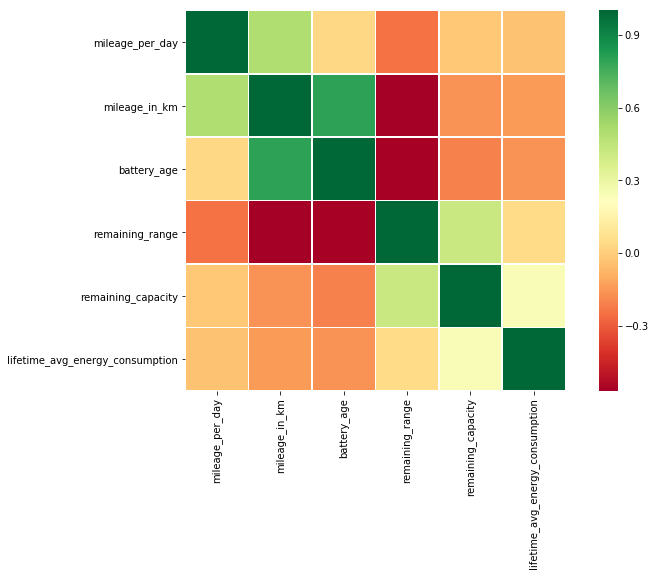

In [33]:
#create a heatmap showing the correlation between different columns of tesla_survey
columns_to_correlate = ['location', 'manufacture_date', 'range_reading_date','mileage_per_day','mileage_in_km',
                        'battery_age', 'remaining_range', 'remaining_capacity', 'lifetime_avg_energy_consumption']
tesla_corr = tesla_survey[columns_to_correlate]
plt.figure(figsize=(11.8, 7))
sns.heatmap(tesla_corr.corr(), square=True, cmap='RdYlGn', linewidths=0.5)
plt.show()

As expected, mileage and remaining range of the battery are negatively correlated. The battery age also negatively affects the remaining range. 

<a href="#contents">Back to Table of Contents</a>

<h3><a id="model" style="color: black;">Model</a></h3>

Questions:
1. What kind of models were logged in?
2. Are all models S?
3. What is the difference among models? 
4. Does model affect the rate of battery degradation?

Next, we can check how many unique models were reported by users. It seems like the majority of the models are S with varying range which depends on the battery size and P(performance) as well as the presence of dual motor (D) which increases the range by 10 miles.

In [34]:
tesla_survey.model.value_counts()

Model S 85            439
Model S P85           163
Model S 85D           101
Model S 70D            90
Model S 90D            83
Model S P85D           81
Model S 60             44
Model S P85+           42
Model S 75             28
Unspecified 85 kWh     24
Model S 90D 2015       14
Model S 75D            11
Model S 70              7
Model X 90D             7
Model S 60D             5
Model S P90D            5
Model X 100D            4
Model S P100D           4
Model S 90              2
Model X P90D            1
Model X 60D             1
Name: model, dtype: int64

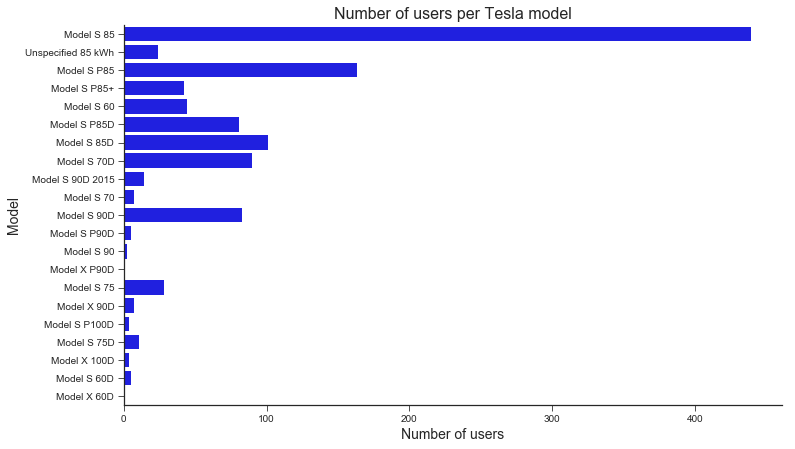

In [35]:
sns.set_style('whitegrid')
sns.set_style('ticks')
plt.figure(figsize=(11.8, 7))
sns.countplot(data=tesla_survey, y='model', color='blue')
sns.despine()
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Number of users per Tesla model', fontsize=16)
plt.show()

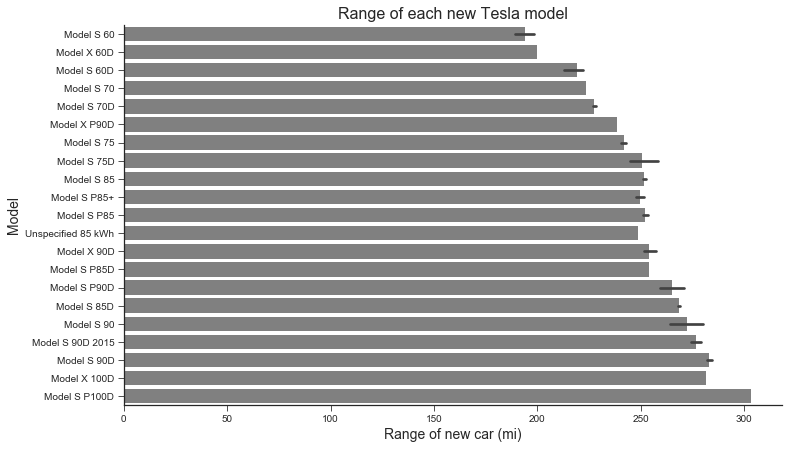

In [36]:
#check how the range of the battery is affected by model
sns.set_style('whitegrid')
sns.set_style('ticks')
result = tesla_survey.groupby(['model'])['range_when_new'].aggregate(np.median).reset_index().sort_values('range_when_new')
plt.figure(figsize=(11.8, 7))
sns.barplot(data=tesla_survey, x='range_when_new', y='model', color='grey', order=result['model'])
sns.despine()
plt.xlabel('Range of new car (mi)', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Range of each new Tesla model', fontsize=16)
plt.show()

As expected, the models with the highest range have the largest battery size and dual-engine configuration (S P100D). Model with the lowest range is a basic S 60 with no additional packages. 

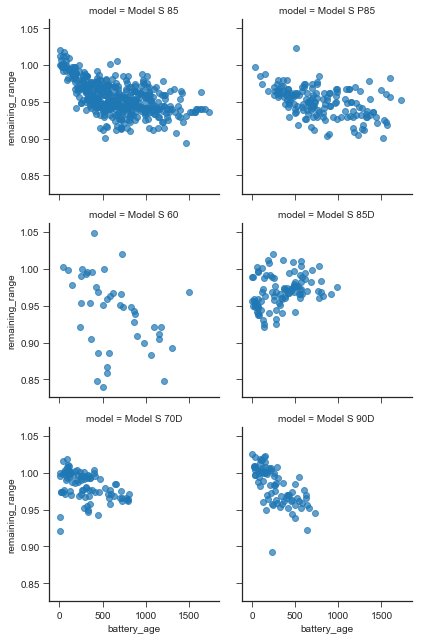

In [37]:
#check how remaining range is affected by battery age for each model
popular_models = ['Model S 85','Model S P85','Model S 85D','Model S 70D','Model S 90D','Model S 60' ]
tesla_popular_models = tesla_survey[tesla_survey['model'].isin(popular_models)]
g = sns.FacetGrid(tesla_popular_models, col='model', margin_titles=True, col_wrap=2)
g.map(plt.scatter, "battery_age", "remaining_range", alpha=0.7)
plt.show()

From the graphs for the remaining range with respect to the battery age (in days), we can see that the range is affected by the battery age. It decreases linearly for smaller capacity models (like Tesla S 60) and flattens out for models in a bigger capacity range (like Tesla S 85, P85, and 90D). This might be attributed to the fact that battery degrades faster if it is smaller.

<a href="#contents">Back to Table of Contents</a>

<h3><a id="mileage" style="color: black;">Mileage</a></h3>

How does the total mileage affect the remaining range?

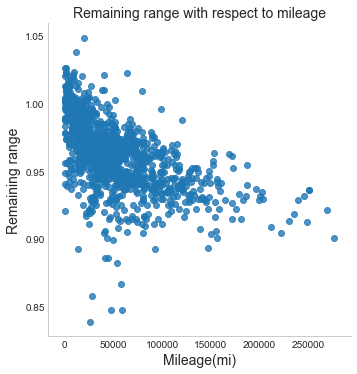

In [38]:
#plot remaining range vs mileage
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot('mileage_in_km', 'remaining_range', tesla_survey, fit_reg=False)
plt.title('Remaining range with respect to mileage', fontsize=14)
plt.xlabel('Mileage(mi)', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.savefig('mileage.png')
plt.show()

Remaining range is negatively correlated with mileage. It seems like the majority of the data points are concentrated around 50000 km. The tail of the scatter graph is more sparse which means that the prediction for cars with higher mileage would be less effective. However, it is evident that battery degradation is quite low (< 10%) as majority of the points are above 90% of remaining capacity. 

In [39]:
smaller_mileage = tesla_survey.mileage < 100000
low_range = tesla_survey.remaining_range < 0.90
outliers = tesla_survey[smaller_mileage & low_range]
print('Models with low mileage and low remaining range')
outliers.model.value_counts()

Models with low mileage and low remaining range


Model S 60     10
Model S 85      1
Model S 90D     1
Name: model, dtype: int64

The majority of very low remaining range values come from the Model S 60 which implies that it might have a higher rate of battery degradation for low mileage than other models.

<a href="#contents">Back to Table of Contents</a>

<h3><a id="age" style="color: black;">Battery age</a></h3>

How does the battery age affect the remaining range?

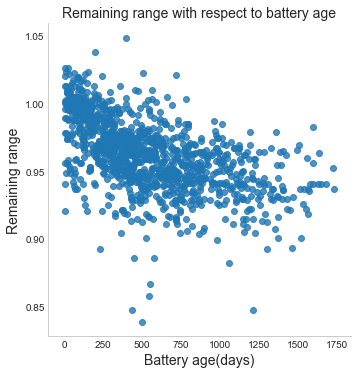

In [40]:
#plot remaining range vs battery age
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot('battery_age', 'remaining_range', tesla_survey, fit_reg=False)
plt.title('Remaining range with respect to battery age', fontsize=14)
plt.xlabel('Battery age(days)', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.savefig('battery_age.png')
plt.show()

Remaining range is negatively correlated with battery age. The majority of the cars (72%) are less than 2 years old which makes battery age a less reliable predictor of the degradation. 

In [41]:
more_year = tesla_survey.battery_age >= 365
less_2_years = tesla_survey.battery_age <= 730
battery_age = {'1 year and less': len(tesla_survey[tesla_survey.battery_age < 365]), 
    '1 year - 2 years': len(tesla_survey[more_year & less_2_years]),
               '2 years and more': len(tesla_survey[tesla_survey.battery_age > 730])}
battery_age

{'1 year - 2 years': 386, '1 year and less': 446, '2 years and more': 320}

In [42]:
battery_age_groups = pd.DataFrame.from_dict(battery_age, orient='index')
battery_age_groups.columns = ['Total number of cars']
battery_age_groups['Percentage'] = battery_age_groups['Total number of cars']*100/1152
battery_age_groups

,Total number of cars,Percentage
1 year - 2 years,386,33.506944
1 year and less,446,38.715278
2 years and more,320,27.777778


<a href="#contents">Back to Table of Contents</a>

<h3><a id="cycles" style="color: black;">Vehicle Cycles</a></h3>

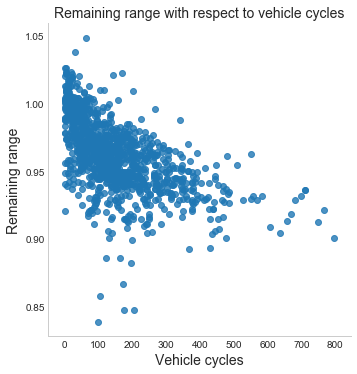

In [43]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot('vehicle_cycles', 'remaining_range', tesla_survey, fit_reg=False)
plt.title('Remaining range with respect to vehicle cycles', fontsize=14)
plt.xlabel('Vehicle cycles', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.savefig('vehicle_cycles.png')
plt.show()

Remaining range is negatively correlated with the number of cycles which implies that more frequent charging might contribute to battery degradation.

<a href="#contents">Back to Table of Contents</a>

<h3><a id="new" style="color: black;">Range when new</a></h3>

This variable might help us deterimine how the original range of the new car which is determined by the battery size can influence the remaining range.

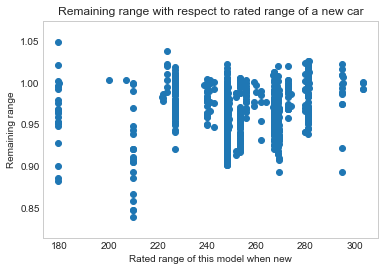

In [44]:
plt.scatter(tesla_survey['range_when_new'], tesla_survey['remaining_range'])
plt.xlabel('Rated range of this model when new')
plt.ylabel('Remaining range')
plt.title('Remaining range with respect to rated range of a new car')
plt.show()

There is no clear relationship between the rated range of a new car and its remaining range.

<a href="#contents">Back to Table of Contents</a>

<h3><a id="super" style="color: black;">Frequency of supercharging</a></h3>

In [45]:
tesla_survey['supercharging_frequency'].value_counts()

D) twice a month           314
E) monthly                 230
F) a few times a year      204
C) weekly                  164
B) twice a week             83
H) never                    23
A) daily                    22
G) once or twice a year     20
Name: supercharging_frequency, dtype: int64

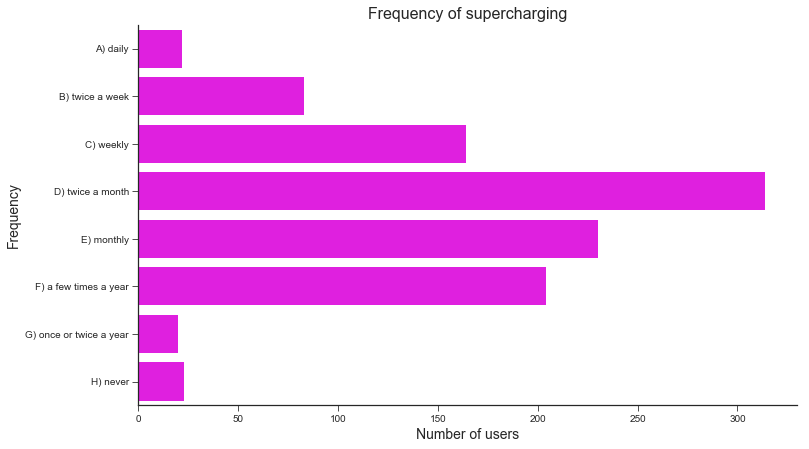

In [46]:
df_supercharge = tesla_survey.copy()
df_supercharge = df_supercharge.dropna(subset=['supercharging_frequency'])
cols = sorted(pd.unique(df_supercharge.supercharging_frequency))
sns.set_style('whitegrid')
sns.set_style('ticks')
plt.figure(figsize=(11.8, 7))
sns.countplot(data=tesla_survey, y='supercharging_frequency', color='magenta',order=cols)
sns.despine()
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of supercharging', fontsize=16)
plt.show()

It seems like the majority of drivers supercharge their cars twice a month.

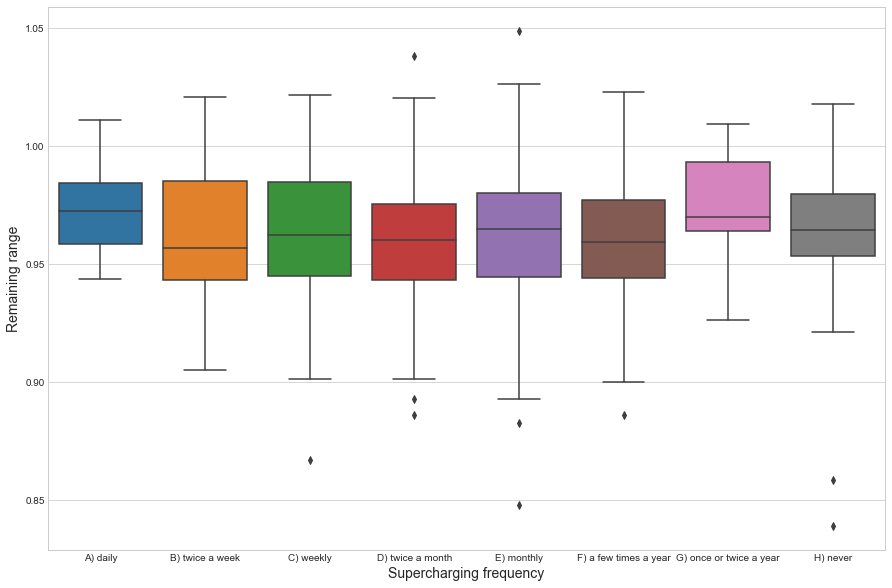

In [47]:
#check how remaining range is affected by frequency of supercharging
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='supercharging_frequency', y='remaining_range', data=df_supercharge, order=cols)
plt.xlabel('Supercharging frequency', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.savefig('supercharging.png')
plt.show()

Supercharging frequency does not seem to affect the remaining range

<a href="#contents">Back to Table of Contents</a>

<h3><a id="full" style="color: black;">Full charge frequency</a></h3>

In [48]:
tesla_survey['full_charge_frequency'].value_counts()

F) a few times a year      419
E) monthly                 308
D) twice a month           147
G) once or twice a year     68
C) weekly                   47
H) never                    30
A) daily                    29
B) twice a week              8
Name: full_charge_frequency, dtype: int64

In [49]:
tesla_copy = tesla_survey.copy()
tesla_copy = tesla_copy.dropna(subset=['full_charge_frequency'])

In [50]:
tesla_copy.loc[tesla_copy.full_charge_frequency == 'B) twice a week', 'full_charge_frequency'] = 'C) weekly'
tesla_copy.loc[tesla_copy.full_charge_frequency == 'C) weekly', 'full_charge_frequency'] = 'B) once or twice a week'
tesla_copy.loc[tesla_copy.full_charge_frequency == 'D) twice a month', 'full_charge_frequency'] = 'C) twice a month'
tesla_copy.loc[tesla_copy.full_charge_frequency == 'E) monthly', 'full_charge_frequency'] = 'D) monthly'
tesla_copy.loc[tesla_copy.full_charge_frequency == 'F) a few times a year', 'full_charge_frequency'] = 'E) a few times a year'
tesla_copy.loc[tesla_copy.full_charge_frequency == 'G) once or twice a year', 'full_charge_frequency'] = 'F) once or twice a year'
tesla_copy.loc[tesla_copy.full_charge_frequency == 'H) never', 'full_charge_frequency'] = 'G) never'

frequencies = pd.unique(tesla_copy['full_charge_frequency'])
freq_dict = {}
for el in frequencies:
    cond = tesla_copy.full_charge_frequency == el
    freq_dict[el] = tesla_copy[cond].remaining_range.std()
freq_dict

{u'A) daily': 0.019443135478656195,
 'B) once or twice a week': 0.03643192840637737,
 'C) twice a month': 0.02528144879460852,
 'D) monthly': 0.024722243968581876,
 'E) a few times a year': 0.024359405813475232,
 'F) once or twice a year': 0.03285486598742719,
 'G) never': 0.028150687298932844}

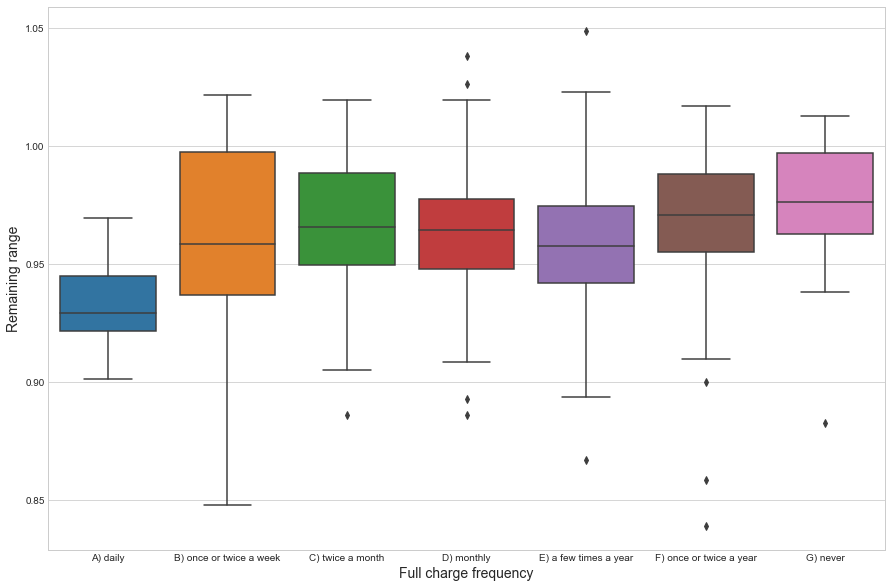

In [51]:
#check how remaining range is affected by frequency of 100% charge
cols = ['A) daily', 'B) once or twice a week', 'C) twice a month', 'D) monthly', 'E) a few times a year', 
        'F) once or twice a year', 'G) never']
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='full_charge_frequency', y='remaining_range', data=tesla_copy, order=cols)
plt.xlabel('Full charge frequency', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.show()

It is evident that having a full charge daily might negatively affect the remaining range.

<a href="#contents">Back to Table of Contents</a>

<h3><a id="empty" style="color: black;">Empty charge frequency</a></h3>

In [52]:
tesla_copy.empty_charge_frequency.value_counts()

H) never                   388
G) once or twice a year    296
F) a few times a year      281
E) monthly                  61
D) twice a month            18
C) weekly                    6
B) twice a week              1
Name: empty_charge_frequency, dtype: int64

In [53]:
tesla_copy4 = tesla_survey.copy()
tesla_copy4 = tesla_copy4.dropna(subset=['empty_charge_frequency'])

tesla_copy4.loc[(tesla_copy4.empty_charge_frequency == 'B) twice a week')| (tesla_copy4.empty_charge_frequency == 'D) twice a month'), 'empty_charge_frequency'] = 'C) weekly'
tesla_copy4.loc[tesla_copy4.empty_charge_frequency == 'C) weekly', 'empty_charge_frequency'] = u'D) one to four times a month'
tesla_copy4.empty_charge_frequency.value_counts(dropna = False)

H) never                        388
G) once or twice a year         297
F) a few times a year           285
E) monthly                       61
D) one to four times a month     25
Name: empty_charge_frequency, dtype: int64

In [54]:
frequencies2 = pd.unique(tesla_copy4['empty_charge_frequency'])
freq_dict2 = {}
for el in frequencies2:
    cond = tesla_copy4.empty_charge_frequency == el
    freq_dict2[el] = tesla_copy4[cond].remaining_range.std()
freq_dict2

{u'D) one to four times a month': 0.029062662185927384,
 u'E) monthly': 0.026853642485780184,
 u'F) a few times a year': 0.02506970500856969,
 u'G) once or twice a year': 0.02612909463858414,
 u'H) never': 0.025174392299277534}

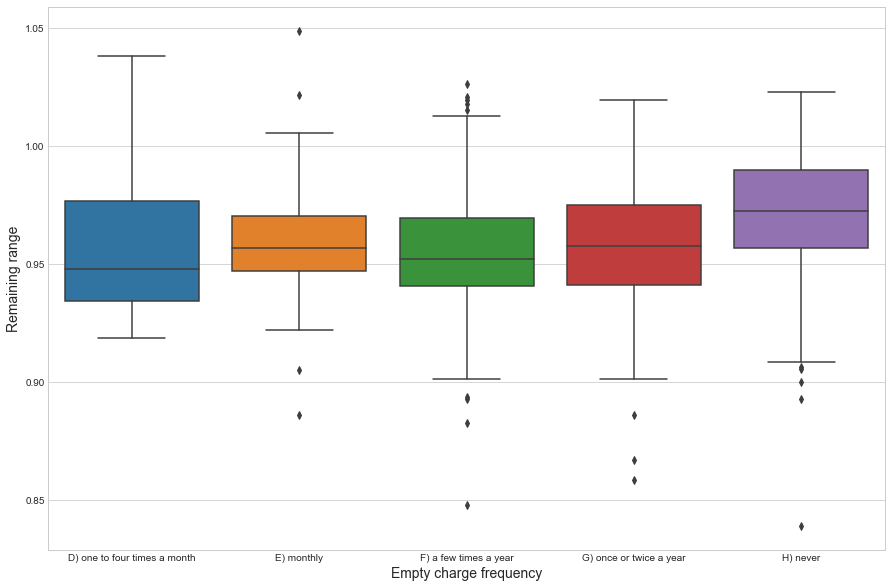

In [55]:
#check how remaining range is affected by frequency of empty charge
cols = ['D) one to four times a month','E) monthly','F) a few times a year','G) once or twice a year','H) never']
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='empty_charge_frequency', y='remaining_range', data=tesla_copy4, order=cols)
plt.xlabel('Empty charge frequency', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.show()

Relationship between the empty charge frequency and remaining range is not clear.

<a href="#contents">Back to Table of Contents</a>

<h3><a id="daily" style="color: black;">Daily charge frequency</a></h3>

In [56]:
tesla_copy.daily_charge.value_counts()

0.9    432
0.8    297
0.7    101
1.0     30
0.6     22
0.5      6
Name: daily_charge, dtype: int64

In [57]:
tesla_copy1 = tesla_copy.dropna(subset=['daily_charge'])
tesla_copy1.loc[tesla_copy1.daily_charge == 0.5, 'daily_charge'] = 0.6

In [58]:
dict = {'7': 'B) ','8': 'C) ', '9': 'D) '}
daily_charge_list = [x / 10.0 for x in range(6,11)]
for charge in daily_charge_list:
    if (charge == 0.6):
        tesla_copy1.loc[tesla_copy1.daily_charge == charge, 'daily_charge'] = 'A) <= 60%'
    elif (charge < 1):
        tesla_copy1.loc[tesla_copy1.daily_charge == charge, 'daily_charge'] = dict[str(charge)[2]]+str(charge)[2] + '0%'
    else:
        tesla_copy1.loc[tesla_copy1.daily_charge == charge, 'daily_charge'] = 'E) 100%'

In [59]:
frequencies3 = pd.unique(tesla_copy1['daily_charge'])
freq_dict3 = {}
for el in frequencies3:
    cond = tesla_copy1.daily_charge == el
    freq_dict3[el] = tesla_copy1[cond].remaining_range.std()
freq_dict3

{'A) <= 60%': 0.03159247951498525,
 'B) 70%': 0.023804811852369958,
 'C) 80%': 0.026066766336013125,
 'D) 90%': 0.028109132973736323,
 'E) 100%': 0.02517025246586537}

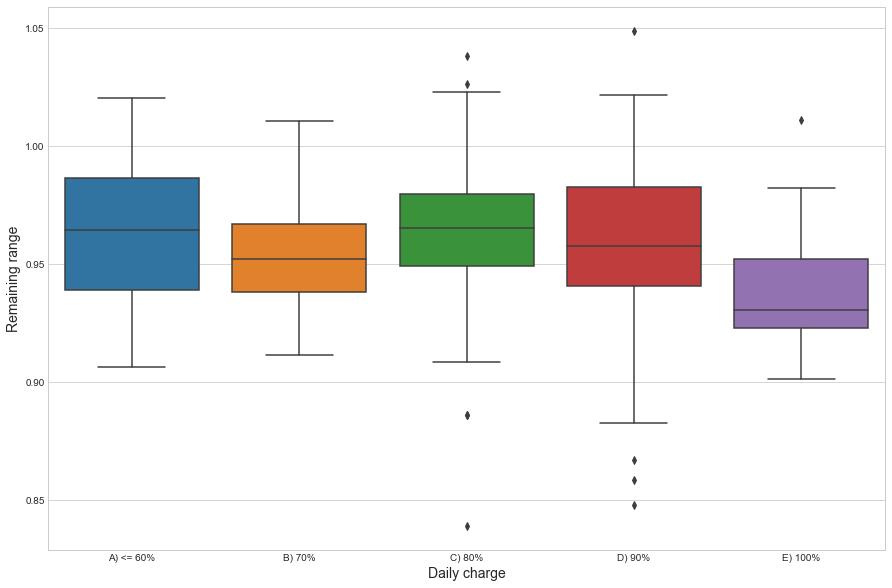

In [60]:
#check how remaining range is affected by daily charge
sns.set_style("whitegrid")
cols = sorted(pd.unique(tesla_copy1['daily_charge']))
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='daily_charge', y='remaining_range', data=tesla_copy1, order=cols)
plt.xlabel('Daily charge', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.show()

It is pretty evident that having 80% daily charge results in a much better remaining range while having a 100% daily charge might affect the remaining range negatively. 

<a href="#contents">Back to Table of Contents</a>

<h3><a id="location" style="color: black;">Location</a></h3>

In [61]:
tesla_survey.loc[tesla_survey.location == 'usa', 'location'] = 'USA'

In [62]:
location_merge = tesla_survey.copy()
location_merge.loc[location_merge.location == 'Asia Pacific & Europe (excl UK)', 'location'] = 'Asia & Europe'
location_merge.loc[location_merge.location == 'UK', 'location'] = 'Asia & Europe'

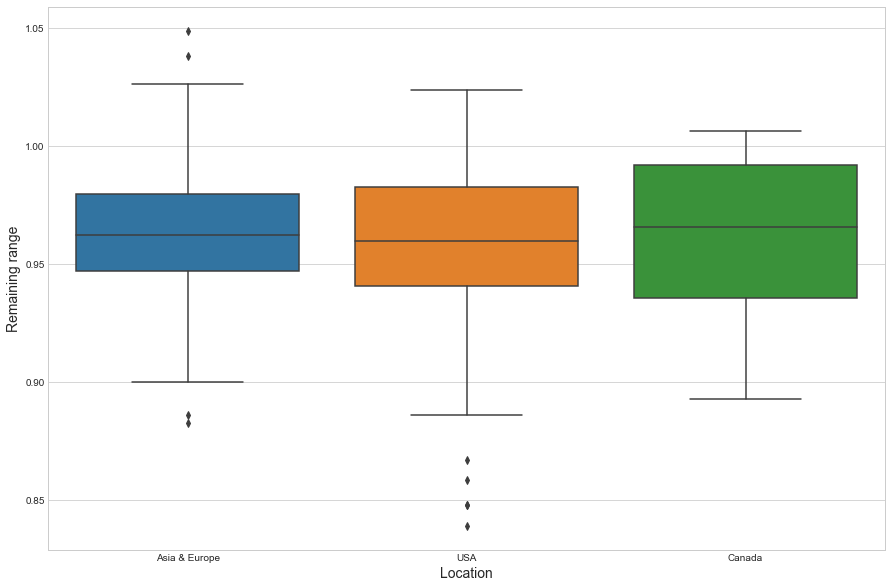

In [63]:
#check how remaining range is affected by daily charge
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='location', y='remaining_range', data=location_merge)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Remaining range', fontsize=14)
plt.show()

<h2><a id="stats" style="color: black;">Inferential statistics</a></h2>

<a href="#contents">Back to Table of Contents</a>

Let's check if any correlations between the battery age, mileage, vehicle cycles and remaining range are statistically significant.

<h3><a id="cor1" style="color: black;">Correlation between mileage and remaining range</a></h3>

<h5>1. Setup an appropriate hypothesis test</h5>

<ul>
    <li>Ho: There is no correlation between the remaining range and mileage of a Tesla car</li>
    <li>Ha: There is a correlation between the remaining range and mileage of a Tesla car</li>
</ul>

<h5>2. Compute the observed significance value</h5>

In our case, it would be useful to determine the Pearson correlation coefficient between the mileage and the remaining range as it would measure the strength of a linear association between two variables. The value of the Pearson correlation ranges from -1 to 1 with 0 denoting the absence of correlation between two variables. According to the preliminary scatter plot, we could expect that the calculated Pearson correlation coefficient is negative s negative as the high values of remaining range are associated with low car mileage, small battery age, and few vehicle cycles. 

In [64]:
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

r = pearson_r(tesla_survey.remaining_range, tesla_survey.mileage)
print('The Pearson correlation coefficient is ' + str(r))

The Pearson correlation coefficient is -0.563524944352


We can deduce that there is a strong negative correlation between the remaining range and mileage of a tesla car. We can perform permutation to determine if the result is statistically significant.

In [65]:
# create permutation replicates and permute remaining_range array while keeping the mileage constant
perm_replicates = np.empty(10000)
for i in range(10000):
    range_permuted = np.random.permutation(tesla_survey.remaining_range)
    perm_replicates[i] = pearson_r(range_permuted, tesla_survey.mileage)
p = np.sum(perm_replicates <= r)/len(perm_replicates)
print('p-val = ' + str(p))

p-val = 0


<h5>3. Report statistical significance for α = .05</h5>

With alpha = 0.05, we get that the p-value is small enough (much smaller than alpha) for us to reject the null hypothesis.<br />
<strong>Conclusion: </strong>correlation between the remaining range and mileage of a Tesla car is statistically significant.

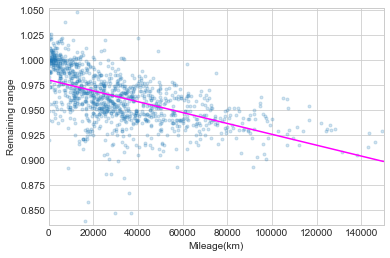

In [66]:
# plot the remaining_range versus mileage
_=plt.plot(tesla_survey.mileage, tesla_survey.remaining_range, marker='.',linestyle='none',alpha=0.2)
plt.margins(0.02)
_=plt.xlabel('Mileage(km)')
_=plt.ylabel('Remaining range')
_=plt.xlim((0,150000))
# perform a linear regression using np.polyfit()
a,b = np.polyfit(tesla_survey.mileage, tesla_survey.remaining_range, deg=1)
# make theoretical line to plot
x = np.array([0,150000])
y = a*x + b
# add regression line to the plot
_ = plt.plot(x,y,color='magenta')
plt.show()

<a href="#contents">Back to Table of Contents</a>

<h3><a id="cor2" style="color: black;">Correlation between battery age and remaining range</a></h3>

<h5>1. Setup an appropriate hypothesis test</h5>

<ul>
    <li>Ho: There is no correlation between the remaining range and battery age of a Tesla car</li>
    <li>Ha: There is a correlation between the remaining range and battery age of a Tesla car</li>
</ul>

<h4>2. Compute the observed significance value</h4>

In [67]:
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

r = pearson_r(new_tesla.remaining_range, new_tesla.battery_age)
print('The Pearson correlation coefficient is ' + str(r))

The Pearson correlation coefficient is -0.558216371045


We can deduce that there is a strong negative correlation between the remaining range and battery age of a tesla car. We can perform permutation to determine if the result is statistically significant.

In [68]:
# create permutation replicates and permute remaining_range array while keeping the mileage constant
perm_replicates = np.empty(10000)
for i in range(10000):
    range_permuted = np.random.permutation(new_tesla.remaining_range)
    perm_replicates[i] = pearson_r(range_permuted, new_tesla.battery_age)
p = np.sum(perm_replicates <= r)/len(perm_replicates)
print('p-val = ' + str(p))

p-val = 0


<h5>3. Report statistical significance for α = .05</h5>

With alpha = 0.05, we get that the p-value is small enough (much smaller than alpha) for us to reject the null hypothesis.<br />
<strong>Conclusion: </strong>correlation between the remaining range and battery age of a Tesla car is statistically significant.

<a href="#contents">Back to Table of Contents</a>

<h3><a id="cor3" style="color: black;">Correlation between vehicle cycles and remaining range</a></h3>

<h5>1. Setup an appropriate hypothesis test</h5>

<ul>
    <li>Ho: There is no correlation between the remaining range and vehicle cycles of a Tesla car</li>
    <li>Ha: There is a correlation between the remaining range and vehicle cycles of a Tesla car</li>
</ul>

<h4>2. Compute the observed significance value</h4>

In [69]:
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

r = pearson_r(new_tesla.remaining_range, new_tesla.vehicle_cycles)
print('The Pearson correlation coefficient is ' + str(r))

The Pearson correlation coefficient is -0.583377686306


In [70]:
# create permutation replicates and permute remaining_range array while keeping the mileage constant
perm_replicates = np.empty(10000)
for i in range(10000):
    range_permuted = np.random.permutation(new_tesla.remaining_range)
    perm_replicates[i] = pearson_r(range_permuted, new_tesla.vehicle_cycles)
p = np.sum(perm_replicates <= r)/len(perm_replicates)
print('p-val = ' + str(p))

p-val = 0


<h5>3. Report statistical significance for α = .05</h5>

With alpha = 0.05, we get that the p-value is small enough (much smaller than alpha) for us to reject the null hypothesis.<br />
<strong>Conclusion: </strong>correlation between the remaining range and vehicle cycles of a Tesla car is statistically significant.

<a href="#contents">Back to Table of Contents</a>

<h3><a id="eff1" style="color: black;">Effect of supercharging frequency on remaining range</a></h3>

<h5>1.Setup an appropriate hypothesis test</h5>

<ul>
    <li>Ho: The mean remaining range for all supercharging frequencies is the same. </li>
    <li>Ha: Two or more means for remaining range are different from the others for supercharging frequencies</li>
</ul>

<h5>2.Compute the observed significance value</h5>

In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('remaining_range ~ supercharging_frequency',
                data=df_supercharge).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

/Users/valentina40/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                           sum_sq      df         F    PR(>F)
supercharging_frequency  0.007649     7.0  1.554605  0.145205
Residual                 0.739416  1052.0       NaN       NaN


<h5>3. Report statistical significance for α = .05</h5>

With alpha = 0.05, we get that the p-value is not small enough (0.145 > 0.05) for us to reject the null hypothesis.<br />
<strong>Conclusion: </strong>The means of remaining range for all supercharging frequencies are the same.

<a href="#contents">Back to Table of Contents</a>

<h3><a id="eff2" style="color: black;">Effect of 100% charge frequency on remaining range</a></h3>

<h5>1.Setup an appropriate hypothesis test</h5>

<ul>
    <li>Ho: The mean remaining range for all 100% battery charge frequencies is the same. </li>
    <li>Ha: Two or more means for remaining range are different from the others for 100% battery charge frequencies</li>
</ul>

<h5>2.Compute the observed significance value</h5>

In [72]:
mod = ols('remaining_range ~ full_charge_frequency',
                data=tesla_copy).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

                         sum_sq      df         F        PR(>F)
full_charge_frequency  0.038355     6.0  9.490905  3.574644e-10
Residual               0.706547  1049.0       NaN           NaN


<h5>3. Report statistical significance for α = .05</h5>

With alpha = 0.05, we get that the p-value is small enough (much smaller than 0.05) for us to reject the null hypothesis.<br />
<strong>Conclusion: </strong>Two or more means for remaining range are different from the others for 100% battery charge frequencies

<a href="#contents">Back to Table of Contents</a>

<h3><a id="eff3" style="color: black;">Effect of empty charge frequency on remaining range</a></h3>

<h5>1.Setup an appropriate hypothesis test</h5>

<ul>
    <li>Ho: The mean remaining range for all empty battery charge frequencies is the same. </li>
    <li>Ha: Two or more means for remaining range are different from the others for empty battery charge frequencies</li>
</ul>

<h5>2.Compute the observed significance value</h5>

In [73]:
mod = ols('remaining_range ~ empty_charge_frequency',
            data=tesla_copy).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

                          sum_sq      df          F        PR(>F)
empty_charge_frequency  0.058925     6.0  14.976977  1.719430e-16
Residual                0.684576  1044.0        NaN           NaN


<h5>3. Report statistical significance for α = .05</h5>

With alpha = 0.05, we get that the p-value is small enough (much smaller than 0.05) for us to reject the null hypothesis.<br />
<strong>Conclusion: </strong>Two or more means for remaining range are different from the others for empty battery charge frequencies

<a href="#contents">Back to Table of Contents</a>

<h3><a id="eff4" style="color: black;">Effect of daily charge level on remaining range</a></h3>

<h5>1.Setup an appropriate hypothesis test</h5>

<ul>
    <li>Ho: The mean remaining range for all daily charge levels is the same. </li>
    <li>Ha: Two or more means for remaining range are different from the others for daily charge levels</li>
</ul>

<h5>2.Compute the observed significance value</h5>

In [74]:
mod = ols('remaining_range ~ daily_charge',
                data=tesla_copy1).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

                sum_sq     df         F        PR(>F)
daily_charge  0.025611    4.0  8.783632  5.905301e-07
Residual      0.643656  883.0       NaN           NaN


<h5>3. Report statistical significance for α = .05</h5>

With alpha = 0.05, we get that the p-value is small enough (much smaller than 0.05) for us to reject the null hypothesis.<br />
<strong>Conclusion: </strong>Two or more means for remaining range are different from the others for daily charge levels

<a href="#contents">Back to Table of Contents</a>

<h3><a id="eff5" style="color: black;">Effect of location on remaining range</a></h3>

<h5>1.Setup an appropriate hypothesis test</h5>

<ul>
    <li>Ho: The mean remaining range for all locations is the same. </li>
    <li>Ha: Two or more means for remaining range are different from the others for locations</li>
</ul>

<h5>2.Compute the observed significance value</h5>

In [75]:
mod = ols('remaining_range ~ location',
                data=location_merge).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

            sum_sq      df         F    PR(>F)
location  0.003315     2.0  2.292945  0.101429
Residual  0.833590  1153.0       NaN       NaN


<h5>3. Report statistical significance for α = .05</h5>

With alpha = 0.05, we get that the p-value is not small enough (0.101 > 0.05) for us to reject the null hypothesis.<br />
<strong>Conclusion: </strong>The mean remaining range for all locations is the same

<a href="#contents">Back to Table of Contents</a>

<h3><a id="multiple" style="color: black;">Multiple t-tests with Bonferroni correction</a></h3>

<h4><a id="t1" style="color: black;">100% charge frequency</a></h4>

In [76]:
# we are going to work with tesla_copy dataframe and "full_charge_frequency" column
# we have 7 categories -> we will have 21 tests to perform
# our alpha = 0.05/21 = 0.00238

<h5>1. Setup appropriate hypotheses</h5>

<ol>
    <li>Ho: The mean remaining range of cars that have 100% charge on a daily basis is the same as that of cars that have 100% charge once or twice a week.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge on a daily basis is the same as that of cars that have 100% charge twice a month.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge on a daily basis is the same as that of cars that have 100% charge monthly.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge on a daily basis is the same as that of cars that have 100% charge a few times a year.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge on a daily basis is the same as that of cars that have 100% charge once or twice a year.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge on a daily basis is the same as that of cars that never have 100% charge.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge once or twice a week is the same as that of cars that have 100% charge twice a month.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge once or twice a week is the same as that of cars that have 100% charge monthly.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge once or twice a week is the same as that of cars that have 100% charge a few time a year.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge once or twice a week is the same as that of cars that have 100% charge once or twice a year.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge once or twice a week is the same as that of cars that never have 100% charge.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge twice a month is the same as that of cars that have 100% charge monthly.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge twice a month is the same as that of cars that have 100% charge a few times a year.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge twice a month is the same as that of cars that have 100% charge once or twice a year.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge twice a month is the same as that of cars that never have 100% charge.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge monthly is the same as that of cars that have 100% charge a few times a year.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge monthly is the same as that of cars that have 100% charge once or twice a year.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge monthly is the same as that of cars that never have 100% charge.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge a few times a year is the same as that of cars that have 100% charge once or twice a year.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge a few times a year is the same as that of cars that never have 100% charge.</li>
    <li>Ho: The mean remaining range of cars that have 100% charge once or twice a year is the same as that of cars that never have 100% charge.</li>
</ol>

<h5>2. Compute t-statistic for each case</h5>

In [77]:
import scipy.stats
alpha = 0.05
alpha_with_correction = alpha/21
def perform_t(group1, group2, num):
    t,p = scipy.stats.ttest_ind(group1, group2, equal_var=False)
    print('T-statistic is ' + str(t) +'; p-value is ' + str(p))
    if (p < alpha_with_correction):
        print('With alpha = %.5f' %alpha_with_correction + ' ,the null hypothesis #' + str(num) + ' can be rejected')
        return 0
    else:
        print('With alpha = ' + str(alpha_with_correction)+' ,the null hypothesis #' + str(num) + ' cannot be rejected')
        return 1

def multiple_t_tests(df, feature):
    groups = sorted(pd.unique(df[feature]))
    matrix = pd.DataFrame(columns=groups, index=groups)
    null_num = 0;
    for group in groups:
        index = groups.index(group)
        if (index != len(groups) - 1):
            for i in range(index+1, len(groups)):
                null_num += 1
                group1 = df[df[feature] == group].remaining_range
                group2 = df[df[feature] == groups[i]].remaining_range
                print('Frequency 1: ' + group + '; Frequency 2: ' + groups[i])
                result = perform_t(group1, group2, null_num)
                matrix.iloc[index, i] = result
                print('---*---*---*---*---*---*---*---*---\n')
    return matrix

In [78]:
result_matrix = multiple_t_tests(tesla_copy, 'full_charge_frequency')

Frequency 1: A) daily; Frequency 2: B) once or twice a week
T-statistic is -4.74794933281; p-value is 8.61352086651e-06
With alpha = 0.00238 ,the null hypothesis #1 can be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: A) daily; Frequency 2: C) twice a month
T-statistic is -8.20490983856; p-value is 9.65128634566e-11
With alpha = 0.00238 ,the null hypothesis #2 can be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: A) daily; Frequency 2: D) monthly
T-statistic is -7.51756874701; p-value is 5.76476841928e-09
With alpha = 0.00238 ,the null hypothesis #3 can be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: A) daily; Frequency 2: E) a few times a year
T-statistic is -6.82994869907; p-value is 6.9390856568e-08
With alpha = 0.00238 ,the null hypothesis #4 can be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: A) daily; Frequency 2: F) once or twice a year
T-statistic is -6.21944062184; p-value is 1.79891054787e-08
With alpha = 0.00238 ,the null 

<h5>3. Report statistical significance with α = .00238</h5>

The resulting data frame demonstrates the results of pairwise t-tests adjusted for Bonferroni correlation to ensure that we do not fall into the trap of Type I error (a significance test results in the rejection of a true null hypothesis). 0 denotes a rejected null hypothesis.

In [79]:
result_matrix.fillna('-', inplace=True)
result_matrix

,A) daily,B) once or twice a week,C) twice a month,D) monthly,E) a few times a year,F) once or twice a year,G) never
A) daily,-,0,0,0,0,0,0
B) once or twice a week,-,-,1,1,1,1,1
C) twice a month,-,-,-,1,0,1,1
D) monthly,-,-,-,-,1,1,1
E) a few times a year,-,-,-,-,-,1,1
F) once or twice a year,-,-,-,-,-,-,1
G) never,-,-,-,-,-,-,-


We can conclude that the presence of full charge on a daily basis had the most significant deviation from the mean remaining range in comparison to other frequencies of fully charged battery. Therefore, we can conclude that having a fully charged battery on a daily basis contributes to battery degradation. 

<h4><a id="t2" style="color: black;">Empty charge frequency</a></h4>

In [80]:
# we are going to work with tesla_copy4 dataframe and "empty_charge_frequency" column
# we have 5 categories -> we will have 10 tests to perform
# our alpha = 0.05/10 = 0.005

<h5>1. Setup appropriate hypotheses</h5>

<ol>
    <li>Ho: The mean remaining range of cars that have empty charge one to four times a month is the same as that of cars that have empty charge monthly.</li>
    <li>Ho: The mean remaining range of cars that have empty charge one to four times a month is the same as that of cars that have empty charge a few times a year.</li>
    <li>Ho: The mean remaining range of cars that have empty charge one to four times a month is the same as that of cars that have empty charge once or twice a year.</li>
    <li>Ho: The mean remaining range of cars that have empty charge one to four times a month is the same as that of cars that never have empty charge.</li>
    <li>Ho: The mean remaining range of cars that have empty charge monthly is the same as that of cars that have empty charge a few times a year.</li>
    <li>Ho: The mean remaining range of cars that have empty charge monthly is the same as that of cars that have empty charge once or twice a year.</li>
    <li>Ho: The mean remaining range of cars that have empty charge monthly is the same as that of cars that never have empty charge.</li>
    <li>Ho: The mean remaining range of cars that have empty charge a few times a year is the same as that of cars that have empty charge once or twice a year.</li>
    <li>Ho: The mean remaining range of cars that have empty charge a few times a year is the same as that of cars that never have empty charge.</li>
    <li>Ho: The mean remaining range of cars that have empty charge once or twice a year is the same as that of cars that never have empty charge.</li>
</ol>

<h5>2. Compute t-statistic for each case</h5>

In [81]:
alpha_with_correction = alpha/10
result_matrix = multiple_t_tests(tesla_copy4, 'empty_charge_frequency')

Frequency 1: D) one to four times a month; Frequency 2: E) monthly
T-statistic is -0.694547501829; p-value is 0.491191505702
With alpha = 0.005 ,the null hypothesis #1 cannot be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: D) one to four times a month; Frequency 2: F) a few times a year
T-statistic is 0.237983753676; p-value is 0.813675696829
With alpha = 0.005 ,the null hypothesis #2 cannot be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: D) one to four times a month; Frequency 2: G) once or twice a year
T-statistic is -0.3844772266; p-value is 0.70359630905
With alpha = 0.005 ,the null hypothesis #3 cannot be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: D) one to four times a month; Frequency 2: H) never
T-statistic is -2.65738471843; p-value is 0.0132012566059
With alpha = 0.005 ,the null hypothesis #4 cannot be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: E) monthly; Frequency 2: F) a few times a year
T-statistic is 1.633595710

<h5>3. Report statistical significance with α = .005</h5>

In [82]:
result_matrix.fillna('-',inplace=True)
result_matrix

,D) one to four times a month,E) monthly,F) a few times a year,G) once or twice a year,H) never
D) one to four times a month,-,1,1,1,1
E) monthly,-,-,1,1,0
F) a few times a year,-,-,-,1,0
G) once or twice a year,-,-,-,-,0
H) never,-,-,-,-,-


We have rejected the null hypothesis for most of the cases (3/4) in which cars never had empty charge. We can conclude that never discharging the battery fully is beneficial for remaining range and could also contribute to decrease in the rate of the battery degradation. 

<h4><a id="t3" style="color: black;">Daily charge frequency</a></h4>

In [83]:
# we are going to work with tesla_copy1 dataframe and "daily_charge" column
# we have 5 categories -> we will have 10 tests to perform
# our alpha = 0.05/10 = 0.005

<h5>1. Setup appropriate hypotheses</h5>

<ol>
    <li>Ho: The mean remaining range of cars that have a daily charge level below 60% is the same as that of cars that have a daily charge level of 70%.</li>
    <li>Ho: The mean remaining range of cars that have a daily charge level below 60% is the same as that of cars that have a daily charge level of 80%.</li>
    <li>Ho: The mean remaining range of cars that have a daily charge level below 60% is the same as that of cars that have a daily charge level of 90%.</li>
    <li>Ho: The mean remaining range of cars that have a daily charge level below 60% is the same as that of cars that have a daily charge level of 100%.</li>
    <li>Ho: The mean remaining range of cars that have a daily charge level of 70% is the same as that of cars that have a daily charge level of 80%.</li>
    <li>Ho: The mean remaining range of cars that have a daily charge level of 70% is the same as that of cars that have a daily charge level of 90%.</li>
    <li>Ho: The mean remaining range of cars that have a daily charge level of 70% is the same as that of cars that have a daily charge level of 100%.</li>
    <li>Ho: The mean remaining range of cars that have a daily charge level of 80% is the same as that of cars that have a daily charge level of 90%.</li>
    <li>Ho: The mean remaining range of cars that have a daily charge level of 80% is the same as that of cars that have a daily charge level of 100%.</li>
    <li>Ho: The mean remaining range of cars that have a daily charge level of 90% is the same as that of cars that have a daily charge level of 100%.</li>
</ol>

<h5>2. Compute t-statistic for each case</h5>

In [84]:
alpha_with_correction = alpha/10
result_matrix = multiple_t_tests(tesla_copy1, 'daily_charge')

Frequency 1: A) <= 60%; Frequency 2: B) 70%
T-statistic is 1.56801837419; p-value is 0.125643301932
With alpha = 0.005 ,the null hypothesis #1 cannot be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: A) <= 60%; Frequency 2: C) 80%
T-statistic is -0.129874907866; p-value is 0.897516345209
With alpha = 0.005 ,the null hypothesis #2 cannot be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: A) <= 60%; Frequency 2: D) 90%
T-statistic is 0.460762143503; p-value is 0.648310205663
With alpha = 0.005 ,the null hypothesis #3 cannot be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: A) <= 60%; Frequency 2: E) 100%
T-statistic is 3.46547438139; p-value is 0.00107444201305
With alpha = 0.00500 ,the null hypothesis #4 can be rejected
---*---*---*---*---*---*---*---*---

Frequency 1: B) 70%; Frequency 2: C) 80%
T-statistic is -3.86829250615; p-value is 0.000151063607871
With alpha = 0.00500 ,the null hypothesis #5 can be rejected
---*---*---*---*---*---*---*---*---



<h5>3. Report statistical significance with α = .005</h5>

In [85]:
result_matrix.fillna('-',inplace=True)
result_matrix

,A) <= 60%,B) 70%,C) 80%,D) 90%,E) 100%
A) <= 60%,-,1,1,1,0
B) 70%,-,-,0,1,0
C) 80%,-,-,-,1,0
D) 90%,-,-,-,-,0
E) 100%,-,-,-,-,-


We have rejected the null hypothesis for all the cases in which one of daily charge values was 100%. We can conclude that daily charge level of 100% contributes to decrease in the remaining range. Also, 80% daily charge level seems to be more beneficial to the remaining range than 70% daily charge level. 

<a href="#contents">Back to Table of Contents</a>

<h2><a id="reg" style="color: black;">Regression</a></h2>

<a href="#contents">Back to Table of Contents</a>

<h3><a id="impute" style="color: black;">Imputation</a></h3>

Full charge frequency, empty charge frequency, and daily charge levels represent categorical variables which we would like to use for predicting the remaining range. However, these variables have some groups which were proved not to have any statistically significant relationships with remaining range. Therefore, we can try to convert these columns to boolean format for the most important groups. For full charge frequency, we can divide the column in the frequency of 'daily' or 1 while other frequency groups should be 0. For empty charge frequency, 'never' should represent 1 while everything else is 0. For daily charge levels, '100%' should count as 1 and the rest is 0. There are also some missing values that we have to fill in in these columns (97 observations for full/empty charge frequency and 254 observations for daily charge levels). These values can be imputed using logistic regression.

In [86]:
new_tesla.loc[new_tesla.full_charge_frequency == 'B) twice a week', 'full_charge_frequency'] = 'C) weekly'
new_tesla.loc[new_tesla.full_charge_frequency == 'C) weekly', 'full_charge_frequency'] = 'B) once or twice a week'
new_tesla.loc[new_tesla.full_charge_frequency == 'D) twice a month', 'full_charge_frequency'] = 'C) twice a month'
new_tesla.loc[new_tesla.full_charge_frequency == 'E) monthly', 'full_charge_frequency'] = 'D) monthly'
new_tesla.loc[new_tesla.full_charge_frequency == 'F) a few times a year', 'full_charge_frequency'] = 'E) a few times a year'
new_tesla.loc[new_tesla.full_charge_frequency == 'G) once or twice a year', 'full_charge_frequency'] = 'F) once or twice a year'
new_tesla.loc[new_tesla.full_charge_frequency == 'H) never', 'full_charge_frequency'] = 'G) never'

In [87]:
new_tesla.loc[(new_tesla.empty_charge_frequency == 'B) twice a week')| (new_tesla.empty_charge_frequency == 'D) twice a month'), 'empty_charge_frequency'] = 'C) weekly'
new_tesla.loc[new_tesla.empty_charge_frequency == 'C) weekly', 'empty_charge_frequency'] = u'D) one to four times a month'

In [88]:
new_tesla.loc[new_tesla.daily_charge == 0.5, 'daily_charge'] = 0.6
dict = {'7': 'B) ','8': 'C) ', '9': 'D) '}
daily_charge_list = [x / 10.0 for x in range(6,11)]
for charge in daily_charge_list:
    if (charge == 0.6):
        new_tesla.loc[new_tesla.daily_charge == charge, 'daily_charge'] = 'A) <= 60%'
    elif (charge < 1):
        new_tesla.loc[new_tesla.daily_charge == charge, 'daily_charge'] = dict[str(charge)[2]]+str(charge)[2] + '0%'
    else:
        new_tesla.loc[new_tesla.daily_charge == charge, 'daily_charge'] = 'E) 100%'

<a href="#contents">Back to Table of Contents</a>

<h4><a id="lg1" style="color: black;">Logistic Regression for imputing 100% charge frequency</a></h4>

In [89]:
# full charge frequency imputation 
# let's label all the results as daily and not daily or 1 and 0
df_imputation = new_tesla.copy()
df_imputation = df_imputation.dropna(subset=['full_charge_frequency'])
df_imputation.loc[df_imputation.full_charge_frequency != 'A) daily', 'full_charge_frequency'] = 0
df_imputation.loc[df_imputation.full_charge_frequency == 'A) daily', 'full_charge_frequency'] = 1

In [90]:
columns_to_drop = ['id', 'username', 'location', 'manufacture_date', 'range_reading_date', 'model',
                    'mileage_per_day', 'range_at_full', 'range_mode', 'range_after_correction', 'battery_replacement',
                    'change_after_replacement', 'range_at_replacement', 'mileage_after_replacement', 
                     'lifetime_avg_energy_consumption', 'range_when_new',
                   'unanswered', 'supercharging_frequency', 'full_charge_frequency', 'empty_charge_frequency', 'daily_charge', 'daily_charge_power',
                   'new_car_range', 'range_mode_new', 
                   'comments', 'remaining_range',
                   'range_mode_adjustment','vehicle_age',
                   'mileage_in_km','wh_km','average_capacity_according_to_chart','deviation_in_capacity']
X = df_imputation.drop(columns_to_drop,axis=1)
y = df_imputation.full_charge_frequency
y = y.astype('int')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055 entries, 0 to 1155
Data columns (total 4 columns):
mileage               1055 non-null float64
battery_age           1055 non-null float64
remaining_capacity    1055 non-null float64
vehicle_cycles        1055 non-null float64
dtypes: float64(4)
memory usage: 41.2 KB


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[412   0]
 [  7   3]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       412
          1       1.00      0.30      0.46        10

avg / total       0.98      0.98      0.98       422



In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X,y, cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.875
AUC scores computed using 5-fold cross-validation: [ 0.99271845  0.93089431  1.          0.9902439   0.82146341]


In [93]:
drop_cols = ['id','username','location','manufacture_date','range_reading_date','model',
             'mileage_per_day', 'range_at_full', 'range_mode', 'range_after_correction', 'battery_replacement',
                    'change_after_replacement', 'range_at_replacement', 'mileage_after_replacement', 
                     'lifetime_avg_energy_consumption', 'range_when_new',
                   'unanswered', 'supercharging_frequency', 'full_charge_frequency', 'empty_charge_frequency', 'daily_charge', 'daily_charge_power',
                   'new_car_range', 'range_mode_new', 
                   'comments', 'remaining_range',
                   'range_mode_adjustment','vehicle_age',
                   'mileage_in_km','wh_km','average_capacity_according_to_chart','deviation_in_capacity']
empty_full_charge = new_tesla[new_tesla.full_charge_frequency.isnull()].drop(drop_cols,axis=1)

In [94]:
y_pred_full = logreg.predict(empty_full_charge)
y_pred_full_str = ['A) daily' if x == 1 else 'H) never' for x in y_pred_full]

In [95]:
empty_full_charge['full_charge_frequency'] = y_pred_full_str

In [96]:
# filling in the results in the master data frame
for el in empty_full_charge.index:
    new_tesla.loc[new_tesla.id == el + 1, 'full_charge_frequency'] = empty_full_charge[empty_full_charge.index == el].full_charge_frequency

<a href="#contents">Back to Table of Contents</a>

<h4><a id="lg2" style="color: black;">Logistic Regression for imputing empty charge frequency</a></h4>

In [97]:
# empty charge frequency imputation 
# let's label all the results as never and not never 
df_imputation1 = new_tesla.copy()
df_imputation1 = df_imputation1.dropna(subset=['empty_charge_frequency'])
df_imputation1.loc[df_imputation1.empty_charge_frequency != 'H) never', 'empty_charge_frequency'] = 0
df_imputation1.loc[df_imputation1.empty_charge_frequency == 'H) never', 'empty_charge_frequency'] = 1

In [98]:
columns_to_drop = ['id', 'username', 'location', 'manufacture_date', 'range_reading_date', 'model',
                 'range_at_full', 'range_mode', 'battery_replacement',
                'change_after_replacement', 'range_at_replacement', 'mileage_after_replacement', 
                'lifetime_avg_energy_consumption', 'range_when_new',
                'unanswered', 'supercharging_frequency', 'full_charge_frequency', 'empty_charge_frequency', 'daily_charge', 'daily_charge_power',
                'new_car_range', 'range_mode_new', 
                'comments', 'remaining_range',
                'range_mode_adjustment','vehicle_age',
                'mileage_in_km','wh_km','average_capacity_according_to_chart','deviation_in_capacity']
X = df_imputation1.drop(columns_to_drop,axis=1)
y = df_imputation1.empty_charge_frequency
y = y.astype('int')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055 entries, 0 to 1155
Data columns (total 6 columns):
mileage                   1055 non-null float64
mileage_per_day           1055 non-null float64
range_after_correction    1055 non-null float64
battery_age               1055 non-null float64
remaining_capacity        1055 non-null float64
vehicle_cycles            1055 non-null float64
dtypes: float64(6)
memory usage: 57.7 KB


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[233  55]
 [ 70  64]]
             precision    recall  f1-score   support

          0       0.77      0.81      0.79       288
          1       0.54      0.48      0.51       134

avg / total       0.70      0.70      0.70       422



In [100]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X,y, cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.690739013267
AUC scores computed using 5-fold cross-validation: [ 0.71536548  0.74894757  0.50703682  0.72649155  0.68372229]


In [101]:
drop_cols = ['id', 'username', 'location', 'manufacture_date', 'range_reading_date', 'model',
                 'range_at_full', 'range_mode', 'battery_replacement',
                'change_after_replacement', 'range_at_replacement', 'mileage_after_replacement', 
                'lifetime_avg_energy_consumption', 'range_when_new',
                'unanswered', 'supercharging_frequency', 'full_charge_frequency', 'empty_charge_frequency', 'daily_charge', 'daily_charge_power',
                'new_car_range', 'range_mode_new', 
                'comments', 'remaining_range',
                'range_mode_adjustment','vehicle_age',
                'mileage_in_km','wh_km','average_capacity_according_to_chart','deviation_in_capacity']
empty_charge_fill = new_tesla[new_tesla.empty_charge_frequency.isnull()].drop(drop_cols,axis=1)

In [102]:
y_pred_empty = logreg.predict(empty_charge_fill)
y_pred_empty_str = ['H) never' if x == 1 else 'daily' for x in y_pred_empty]

In [103]:
empty_charge_fill['empty_charge_frequency'] = y_pred_empty_str

In [104]:
# filling in the results in the master data frame
for el in empty_charge_fill.index:
    new_tesla.loc[new_tesla.id == el + 1, 'empty_charge_frequency'] = empty_charge_fill[empty_charge_fill.index == el].empty_charge_frequency

<a href="#contents">Back to Table of Contents</a>

<h4><a id="lg3" style="color: black;">Logistic Regression for imputing daily charge frequency</a></h4>

In [105]:
# daily charge level imputation 
# let's label all the results as 100% and not 100% daily charge level 
df_imputation2 = new_tesla.copy()
df_imputation2 = df_imputation2.dropna(subset=['daily_charge'])
df_imputation2.loc[df_imputation2.daily_charge != 'E) 100%', 'daily_charge'] = 0
df_imputation2.loc[df_imputation2.daily_charge == 'E) 100%', 'daily_charge'] = 1

In [106]:
columns_to_drop = ['id', 'username', 'location', 'manufacture_date', 'range_reading_date', 'model',
                 'range_at_full', 'range_mode', 'battery_replacement',
                'change_after_replacement', 'range_at_replacement', 'mileage_after_replacement', 
                'lifetime_avg_energy_consumption', 'range_when_new',
                'unanswered', 'supercharging_frequency', 'full_charge_frequency', 'empty_charge_frequency', 'daily_charge', 'daily_charge_power',
                'new_car_range', 'range_mode_new', 
                'comments', 'remaining_range',
                'range_mode_adjustment','vehicle_age',
                'mileage_in_km','wh_km','average_capacity_according_to_chart','deviation_in_capacity']
X = df_imputation2.drop(columns_to_drop,axis=1)
y = df_imputation2.daily_charge
y = y.astype('int')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 1155
Data columns (total 6 columns):
mileage                   898 non-null float64
mileage_per_day           898 non-null float64
range_after_correction    898 non-null float64
battery_age               898 non-null float64
remaining_capacity        898 non-null float64
vehicle_cycles            898 non-null float64
dtypes: float64(6)
memory usage: 49.1 KB


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[345   3]
 [  7   5]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       348
          1       0.62      0.42      0.50        12

avg / total       0.97      0.97      0.97       360



In [108]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X,y, cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.925766283525
AUC scores computed using 5-fold cross-validation: [ 0.97126437  0.97605364  0.9664751   0.98843931  0.86030829]


In [109]:
drop_cols = ['id', 'username', 'location', 'manufacture_date', 'range_reading_date', 'model',
                 'range_at_full', 'range_mode', 'battery_replacement',
                'change_after_replacement', 'range_at_replacement', 'mileage_after_replacement', 
                'lifetime_avg_energy_consumption', 'range_when_new',
                'unanswered', 'supercharging_frequency', 'full_charge_frequency', 'empty_charge_frequency', 'daily_charge', 'daily_charge_power',
                'new_car_range', 'range_mode_new', 
                'comments', 'remaining_range',
                'range_mode_adjustment','vehicle_age',
                'mileage_in_km','wh_km','average_capacity_according_to_chart','deviation_in_capacity']
daily_charge_fill = new_tesla[new_tesla.daily_charge.isnull()].drop(drop_cols,axis=1)

In [110]:
y_pred_charge = logreg.predict(daily_charge_fill)
y_pred_charge_str = ['E) 100%' if x == 1 else '80%' for x in y_pred_charge]

In [111]:
daily_charge_fill['daily_charge'] = y_pred_charge_str

In [112]:
# filling in the results in the master data frame
for el in daily_charge_fill.index:
    new_tesla.loc[new_tesla.id == el + 1, 'daily_charge'] = daily_charge_fill[daily_charge_fill.index == el].daily_charge

<a href="#contents">Back to Table of Contents</a>

<h4><a id="lg4" style="color: black;">Conversion of imputed columns to boolean </a></h4>

In [113]:
# converting the columns to boolean format
def boolean_conversion(df, column, category):
    df.loc[df[column] != category, column] = 0
    df.loc[df[column] == category, column] = 1
boolean_conversion(new_tesla, 'full_charge_frequency', 'A) daily')
boolean_conversion(new_tesla, 'empty_charge_frequency', 'H) never')
boolean_conversion(new_tesla, 'daily_charge', 'E) 100%')
new_tesla.full_charge_frequency.value_counts()

0    1122
1      30
Name: full_charge_frequency, dtype: int64

In [114]:
# checking for any nan values 
new_tesla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1155
Data columns (total 36 columns):
id                                     1152 non-null int64
username                               1152 non-null object
location                               1152 non-null object
manufacture_date                       1152 non-null datetime64[ns]
range_reading_date                     1152 non-null datetime64[ns]
model                                  1152 non-null object
mileage                                1152 non-null float64
mileage_per_day                        1152 non-null float64
range_at_full                          1152 non-null float64
range_mode                             1152 non-null object
range_after_correction                 1152 non-null float64
battery_replacement                    1152 non-null object
change_after_replacement               66 non-null object
range_at_replacement                   65 non-null float64
mileage_after_replacement            

<a href="#contents">Back to Table of Contents</a>

<h3><a id="ols" style="color: black;">Linear regression using STATSMODELS</a></h3>

In [151]:
df_regression = new_tesla.copy()
cols_to_remove = ['wh_km', 'vehicle_age',
                  'range_mode_adjustment', 'comments','range_mode_new','new_car_range','daily_charge_power','unanswered','mileage_after_replacement','range_at_replacement',
                 'change_after_replacement','battery_replacement','range_at_full','range_mode','model',
                  'range_reading_date','manufacture_date','location','username','id', 'remaining_capacity', 'mileage_in_km',
                 'supercharging_frequency','lifetime_avg_energy_consumption']
df_regression = df_regression.drop(cols_to_remove, axis=1)
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1155
Data columns (total 12 columns):
mileage                                1152 non-null float64
mileage_per_day                        1152 non-null float64
range_after_correction                 1152 non-null float64
battery_age                            1152 non-null float64
range_when_new                         1152 non-null float64
remaining_range                        1152 non-null float64
full_charge_frequency                  1152 non-null object
empty_charge_frequency                 1152 non-null object
daily_charge                           1152 non-null object
vehicle_cycles                         1152 non-null float64
average_capacity_according_to_chart    1152 non-null float64
deviation_in_capacity                  1152 non-null float64
dtypes: float64(9), object(3)
memory usage: 117.0+ KB


In [152]:
df_regression['full_charge_with_time'] = df_regression.full_charge_frequency * df_regression.battery_age
df_regression['empty_charge_with_time'] = df_regression.empty_charge_frequency * df_regression.battery_age
df_regression['daily_charge_with_time'] = df_regression.daily_charge * df_regression.battery_age

In [153]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('remaining_range ~ vehicle_cycles',df_regression).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:        remaining_range   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     593.3
Date:                Mon, 22 Jan 2018   Prob (F-statistic):          5.22e-106
Time:                        08:39:23   Log-Likelihood:                 2769.3
No. Observations:                1152   AIC:                            -5535.
Df Residuals:                    1150   BIC:                            -5524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9811      0.001    983.

In [157]:
m = ols('remaining_range ~ vehicle_cycles + battery_age + full_charge_with_time + daily_charge_with_time + full_charge_frequency + empty_charge_frequency +empty_charge_with_time + daily_charge + range_when_new',df_regression).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:        remaining_range   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     2.795
Date:                Mon, 22 Jan 2018   Prob (F-statistic):           1.37e-33
Time:                        08:41:21   Log-Likelihood:                 3019.4
No. Observations:                1152   AIC:                            -5291.
Df Residuals:                     778   BIC:                            -3402.
Df Model:                         373                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

<a href="#contents">Back to Table of Contents</a>

<h3><a id="sk" style="color: black;">Regression using Sklearn</a></h3>

<h4><a id="skimport" style="color: black;">Import packages and define regressors</a></h4>

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
cols_to_drop = ['remaining_range','range_after_correction', 'average_capacity_according_to_chart','deviation_in_capacity']
X = df_regression.drop(cols_to_drop, axis = 1)
lm = LinearRegression()

In [161]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1155
Data columns (total 11 columns):
mileage                   1152 non-null float64
mileage_per_day           1152 non-null float64
battery_age               1152 non-null float64
range_when_new            1152 non-null float64
full_charge_frequency     1152 non-null object
empty_charge_frequency    1152 non-null object
daily_charge              1152 non-null object
vehicle_cycles            1152 non-null float64
full_charge_with_time     1152 non-null object
empty_charge_with_time    1152 non-null object
daily_charge_with_time    1152 non-null object
dtypes: float64(5), object(6)
memory usage: 148.0+ KB


In [179]:
def linear_regression_estimator(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    reg_all = linear_model.LinearRegression()
    cv_scores = cross_val_score(reg_all, X, y, cv=5)
    print(cv_scores)
    print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
    reg_all.fit(X_train, y_train)
    y_pred = reg_all.predict(X_test)
    r2 = reg_all.score(X_test, y_test)
    print("R^2: {}".format(r2))
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error: {}".format(rmse))
    print('---*---*---*---*---*---*---*---*---\n')
    predict_original_plot(y_pred, y_test)
    return r2, rmse
    
def Ridge_regressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
    alpha_space = np.logspace(-4, 0, 50)
    ridge_scores = []
    ridge_scores_std = []
    ridge = Ridge(normalize=True, alpha=0.01)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    r2 = ridge.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    for alpha in alpha_space:
        # Specify the alpha value to use: ridge.alpha
        ridge.alpha = alpha

        # Perform 10-fold CV: ridge_cv_scores
        ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)

        # Append the mean of ridge_cv_scores to ridge_scores
        ridge_scores.append(np.mean(ridge_cv_scores))

        # Append the std of ridge_cv_scores to ridge_scores_std
        ridge_scores_std.append(np.std(ridge_cv_scores))
    # Display the plot
    display_plot(ridge_scores, ridge_scores_std, alpha_space)
    predict_original_plot(y_pred, y_test)
    print("R^2: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print('---*---*---*---*---*---*---*---*---\n')
    return r2, rmse
    
def ElasticNet_regressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
    l1_space = np.linspace(0, 1, 30)
    param_grid = {'l1_ratio': l1_space}
    elastic_net = ElasticNet()
    gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
    gm_cv.fit(X_train, y_train)
    y_pred = gm_cv.predict(X_test)
    r2 = gm_cv.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
    print("Tuned ElasticNet R squared: {}".format(r2))
    print("Tuned ElasticNet RMSE: {}".format(rmse))
    predict_original_plot(y_pred, y_test)
    return r2, rmse

def RandomForest_regressor(X,y,features):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
    rf = RandomForestRegressor(n_estimators=features, oob_score=True, random_state=0)
    rf.fit(X_train, y_train)
    predicted_train = rf.predict(X_train)
    predicted_test = rf.predict(X_test)
    test_score = r2_score(y_test, predicted_test)
    rmse = np.sqrt(mean_squared_error(y_test, predicted_test))
    print("R^2: {}".format(test_score))
    print("Root Mean Squared Error: {}".format(rmse))
    print('---*---*---*---*---*---*---*---*---\n')
    predict_original_plot(predicted_test, y_test)
    return test_score, rmse

def compare_plot(X,y,features):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
    # linear model
    lm = linear_model.LinearRegression()
    lm.fit(X_train, y_train)
    lm_pred = lm.predict(X_test)
    
    #linear forest model
    rf = RandomForestRegressor(n_estimators=features, oob_score=True, random_state=0)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    
    #elastic net 
    elastic_net = ElasticNet()
    l1_space = np.linspace(0, 1, 30)
    param_grid = {'l1_ratio': l1_space}
    gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
    gm_cv.fit(X_train, y_train)
    en_pred = gm_cv.predict(X_test)
    
    # ridge regression
    ridge = Ridge(normalize=True, alpha=0.01)
    ridge.fit(X_train, y_train)
    r_pred = ridge.predict(X_test)
    
    # plot regressors
    fig,ax = plt.subplots(figsize=(11.8, 7))
    ax.grid(False)
    plt.plot(lm_pred, y_test, 'co',alpha=0.3)
    plt.plot(rf_pred, y_test, 'mo',alpha=0.3)
    plt.plot(en_pred, y_test, 'ko', alpha=0.3)
    plt.plot(r_pred, y_test, 'yo', alpha=0.3)
    plt.legend(['Linear Regressor','Random Forest Regressor','Elastic Net','Ridge'], loc='lower right')
    plt.xlabel('Predicted Remaining Range')
    plt.ylabel('Original Remaining Range')
    plt.title('Original vs. Predicted Remaining Range by Regressor')
    plt.show()
    
def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.5)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
def two_plots(X,y1,y2):
    plt.subplot(2,1,1)
    plt.plot(X, y1,'go')
    plt.ylabel('Original Remaining Range')
    plt.xlabel('Predicted Remaining Range') 
    plt.title('Original vs Predicted Remaining Range')
    
    plt.subplot(2,1,2)
    plt.plot(X, y2,'mo')
    plt.ylabel('Original Fractional Remaining Range')
    plt.xlabel('Predicted Fractional Remaining Range') 
    plt.title('Original vs Predicted Fractional Remaining Range')
    plt.show()
    

def predict_original_plot(y_pred, y_original):
    fig = plt.figure(figsize=(11.8, 7))
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    plt.scatter(y_pred, y_original)
    plt.ylabel('Original Remaining Range')
    plt.xlabel('Predicted Remaining Range') 
    plt.title('Original vs Predicted Remaining Range')
    plt.show()
    
def predict_percent_plot(y_pred, y_original):
    fig = plt.figure(figsize=(11.8, 7))
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    plt.scatter(y_pred, y_original)
    plt.ylabel('Original Fractional Remaining Range')
    plt.xlabel('Predicted Fractional Remaining Range') 
    plt.title('Original vs Predicted Fractional Remaining Range')
    plt.show()

<a href="#contents">Back to Table of Contents</a>

<h4><a id="sk1" style="color: black;">Linear fitting with no split</a></h4>

In [198]:
lm.fit(X, df_regression.range_after_correction)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [199]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 0.252117060744


In [200]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 11


In [201]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,mileage,0.000148
1,mileage_per_day,-0.036460
2,battery_age,-0.006360
3,range_when_new,0.987871
4,full_charge_frequency,-6.699720
5,empty_charge_frequency,2.017417
6,daily_charge,4.325895
7,vehicle_cycles,-0.043806
8,full_charge_with_time,0.000038
9,empty_charge_with_time,-0.001134


In [202]:
remaining_range = df_regression.range_after_correction/df_regression.range_when_new
remaining_range_predict = lm.predict(X)/df_regression.range_when_new

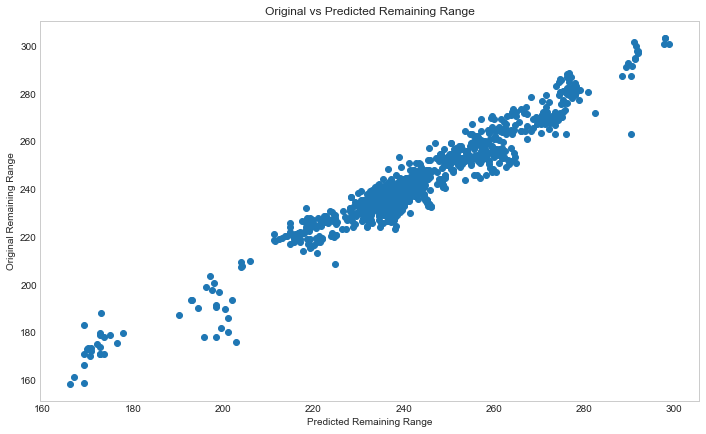

In [203]:
predict_original_plot(lm.predict(X), df_regression.range_after_correction)

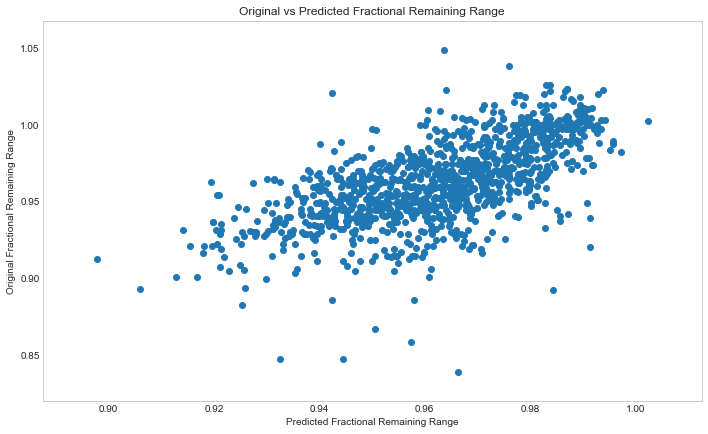

In [204]:
predict_percent_plot(remaining_range_predict,remaining_range)

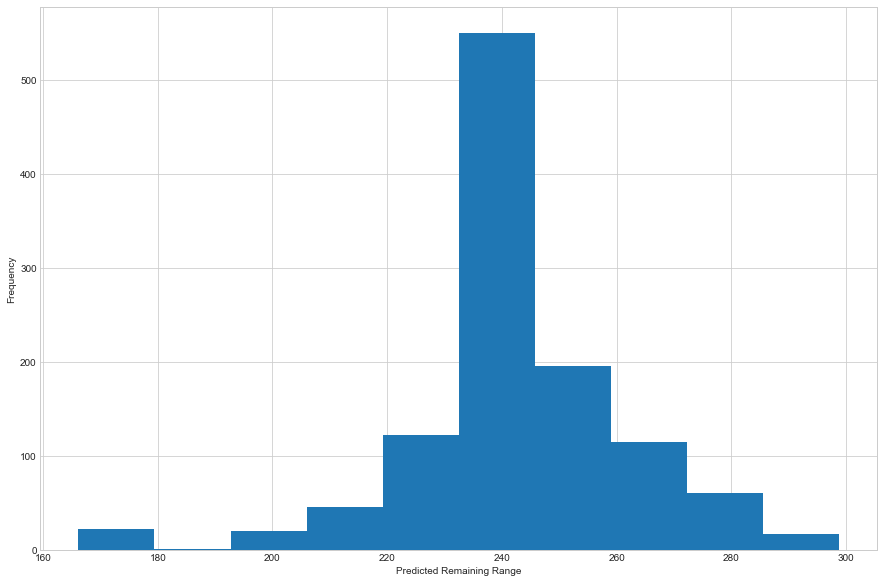

In [205]:
plt.hist(lm.predict(X))
plt.xlabel('Predicted Remaining Range')
plt.ylabel('Frequency')
plt.show()

In [167]:
master_r2 = []
master_rmse = []
percent_r2 = []
percent_rmse = []
regressors = ['Linear Regression', 'Ridge Regression','Elastic Net', 'Random Forest']

In [168]:
cols_to_remove = ['mileage_per_day','battery_age','full_charge_frequency','empty_charge_frequency','daily_charge',
                  'vehicle_cycles','remaining_range','range_after_correction']
X_check = df_regression.drop(cols_to_remove,axis=1)
X_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1155
Data columns (total 7 columns):
mileage                                1152 non-null float64
range_when_new                         1152 non-null float64
average_capacity_according_to_chart    1152 non-null float64
deviation_in_capacity                  1152 non-null float64
full_charge_with_time                  1152 non-null object
empty_charge_with_time                 1152 non-null object
daily_charge_with_time                 1152 non-null object
dtypes: float64(4), object(3)
memory usage: 112.0+ KB


<a href="#contents">Back to Table of Contents</a>

<h4><a id="sk2" style="color: black;">Linear fitting with Train/Test Split on Remaining Range (mi vs %)</a></h4>

[ 0.93610969  0.7864341   0.93365236  0.93058612  0.93332973]
Average 5-Fold CV Score: 0.904022400837
R^2: 0.936940287145
Root Mean Squared Error: 4.94167830255
---*---*---*---*---*---*---*---*---



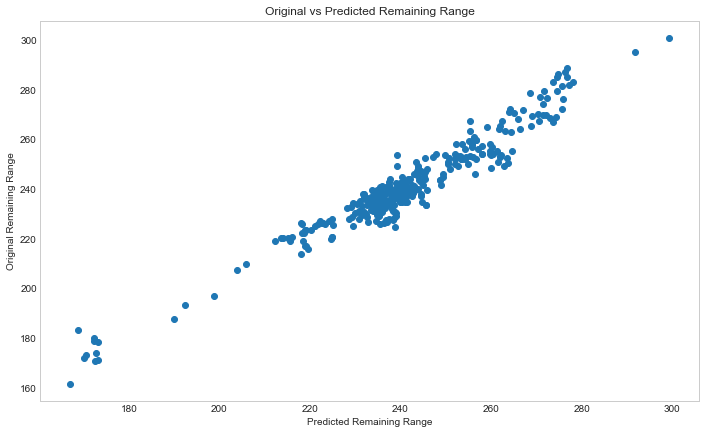

In [169]:
r2, rmse = linear_regression_estimator(X, df_regression.range_after_correction)
master_r2.append(r2)
master_rmse.append(rmse)

[ 0.27947476  0.13863063  0.41198724  0.23685784  0.34441882]
Average 5-Fold CV Score: 0.28227385567
R^2: 0.39598137862
Root Mean Squared Error: 0.0197147327649
---*---*---*---*---*---*---*---*---



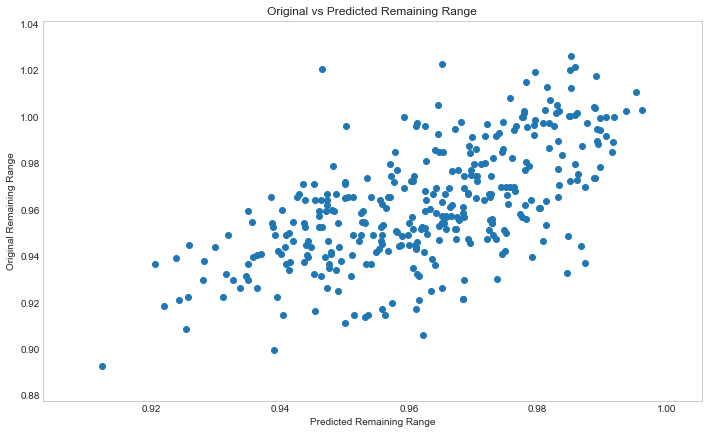

In [170]:
r2, rmse = linear_regression_estimator(X, df_regression.remaining_range)
percent_r2.append(r2)
percent_rmse.append(rmse)

[ 0.88774048  0.71586721  0.89095264  0.91750175  0.887994  ]
Average 5-Fold CV Score: 0.860011216898
R^2: 0.898138283095
Root Mean Squared Error: 6.28064102297
---*---*---*---*---*---*---*---*---



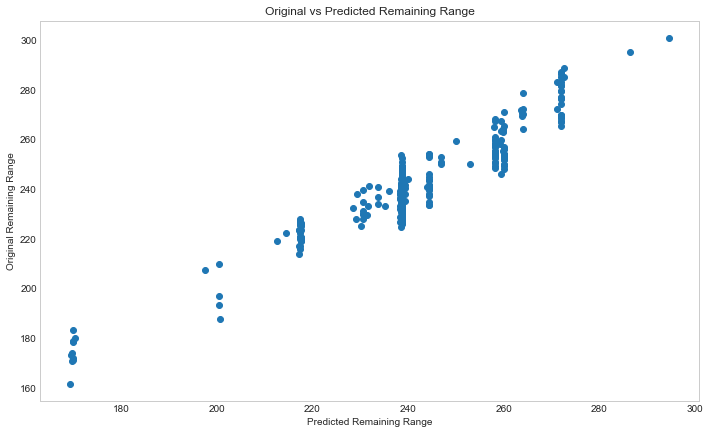

(0.8981382830951341, 6.280641022974967)

In [134]:
linear_regression_estimator(X_check, df_regression.range_after_correction)

<a href="#contents">Back to Table of Contents</a>

<h4><a id="sk3" style="color: black;">Ridge regression with Train/Test Split on Remaining Range (mi vs %)</a></h4>

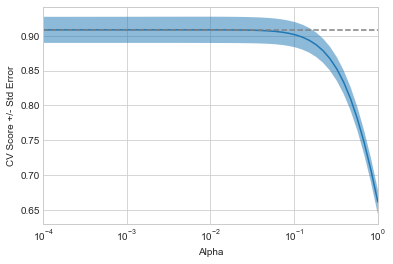

R^2: 0.93919294948
Root Mean Squared Error: 4.98714387721
---*---*---*---*---*---*---*---*---



In [171]:
r2, rmse = Ridge_regressor(X,df_regression.range_after_correction)
master_r2.append(r2)
master_rmse.append(rmse)

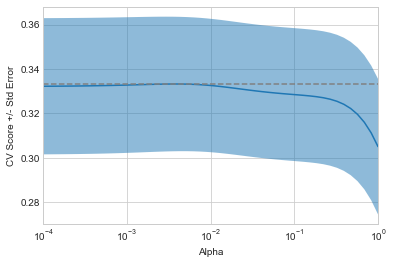

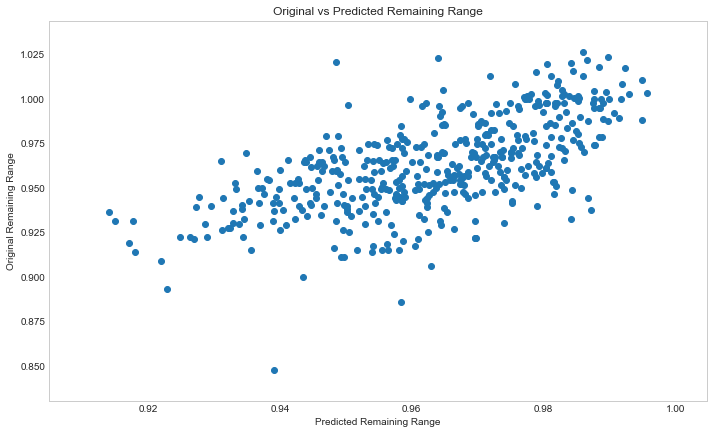

R^2: 0.403950834587
Root Mean Squared Error: 0.0201305138037
---*---*---*---*---*---*---*---*---



In [180]:
r2, rmse = Ridge_regressor(X,df_regression.remaining_range)
percent_r2.append(r2)
percent_rmse.append(rmse)

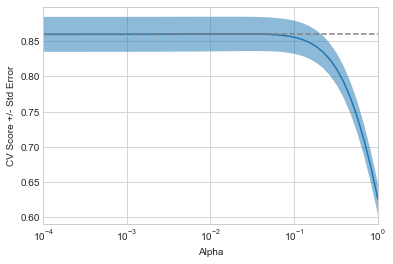

R^2: 0.900215386959
Root Mean Squared Error: 6.38861500628
---*---*---*---*---*---*---*---*---



(0.90021538695934578, 6.388615006275602)

In [137]:
Ridge_regressor(X_check,df_regression.range_after_correction)

<a href="#contents">Back to Table of Contents</a>

<h4><a id="sk4" style="color: black;">Elastic Net regression with Train/Test Split on Remaining Range (mi vs %)</a></h4>

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.938884350264
Tuned ElasticNet RMSE: 4.99978288


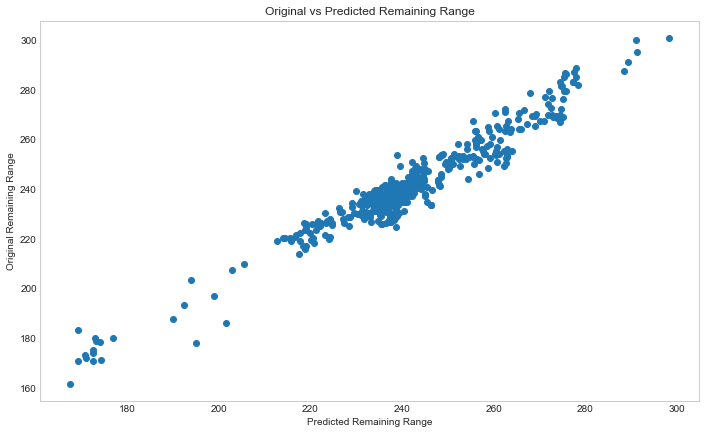

In [173]:
r2, rmse = ElasticNet_regressor(X, df_regression.range_after_correction)
master_r2.append(r2)
master_rmse.append(rmse)

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.401854034804
Tuned ElasticNet RMSE: 0.0201658905838


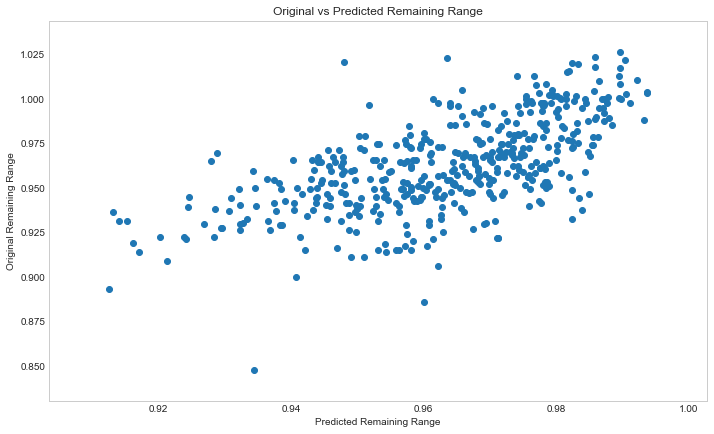

In [174]:
r2, rmse = ElasticNet_regressor(X, df_regression.remaining_range)
percent_r2.append(r2)
percent_rmse.append(rmse)

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.899997782736
Tuned ElasticNet RMSE: 6.39557716446


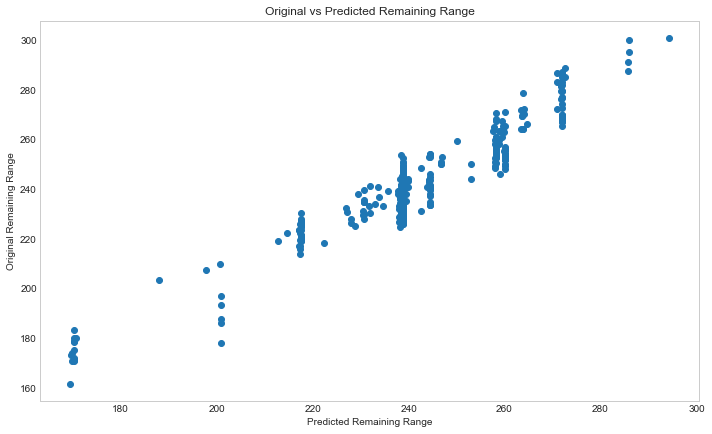

(0.89999778273609055, 6.3955771644620807)

In [140]:
ElasticNet_regressor(X_check, df_regression.range_after_correction)

<a href="#contents">Back to Table of Contents</a>

<h4><a id="sk5" style="color: black;">Random Forest regression with Train/Test Split on Remaining Range (mi vs %)</a></h4>

For estimator = 50
R^2: 0.951056542327
Root Mean Squared Error: 4.47427066082
---*---*---*---*---*---*---*---*---



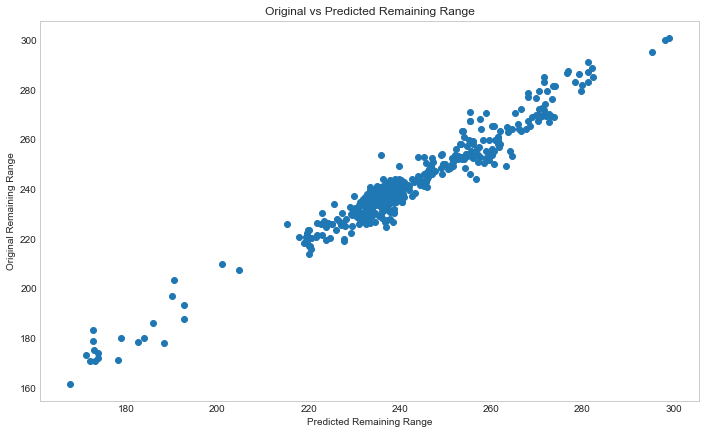

For estimator = 100
R^2: 0.951237431743
Root Mean Squared Error: 4.46599481103
---*---*---*---*---*---*---*---*---



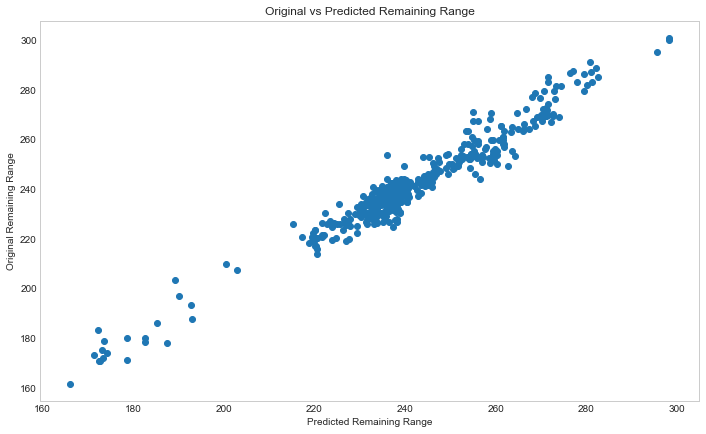

For estimator = 150
R^2: 0.952089328427
Root Mean Squared Error: 4.42681178815
---*---*---*---*---*---*---*---*---



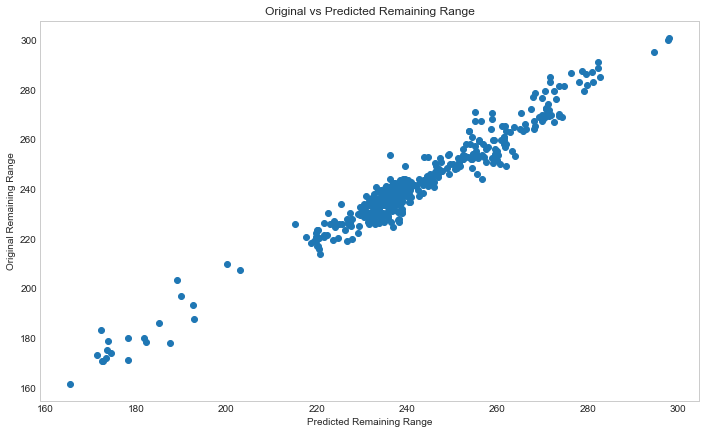

For estimator = 200
R^2: 0.952091463201
Root Mean Squared Error: 4.42671316351
---*---*---*---*---*---*---*---*---



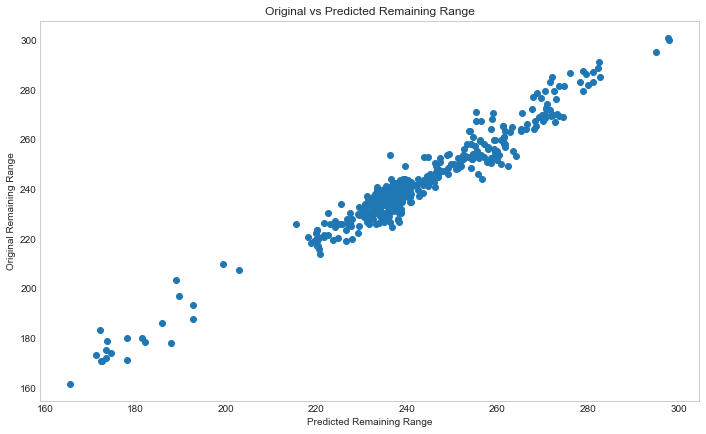

For estimator = 250
R^2: 0.952400588604
Root Mean Squared Error: 4.41240857276
---*---*---*---*---*---*---*---*---



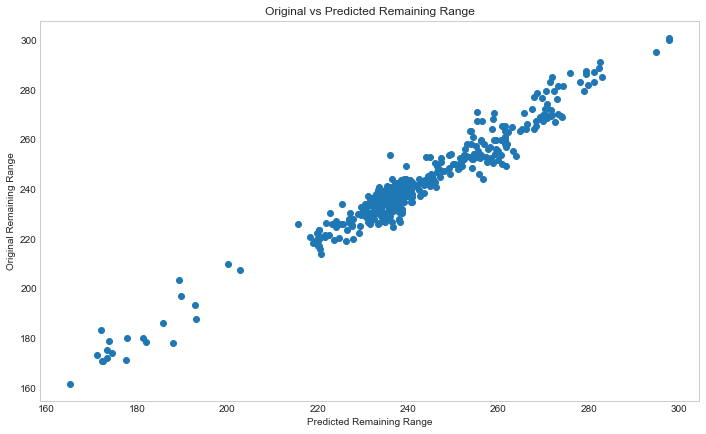

For estimator = 300
R^2: 0.952580085402
Root Mean Squared Error: 4.40408114533
---*---*---*---*---*---*---*---*---



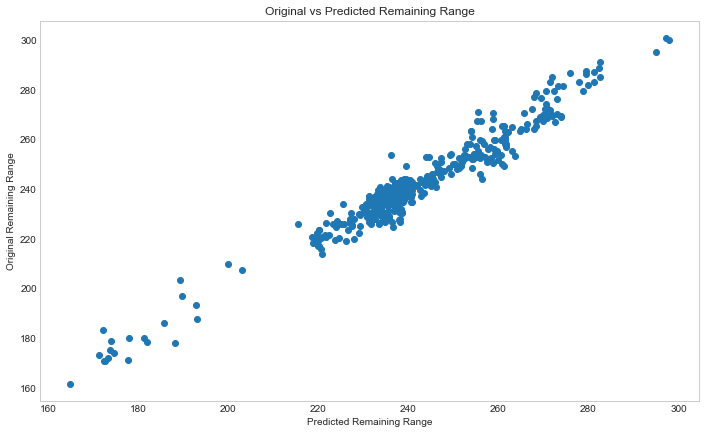

For estimator = 350
R^2: 0.95265148089
Root Mean Squared Error: 4.40076450116
---*---*---*---*---*---*---*---*---



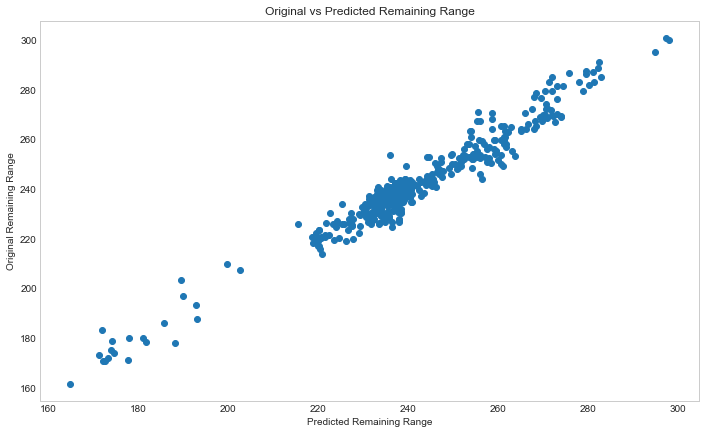

For estimator = 400
R^2: 0.95267908813
Root Mean Squared Error: 4.39948134936
---*---*---*---*---*---*---*---*---



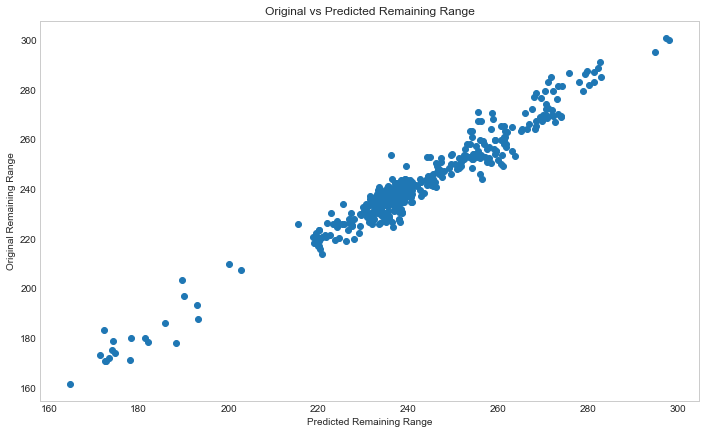

For estimator = 450
R^2: 0.952735654564
Root Mean Squared Error: 4.39685103883
---*---*---*---*---*---*---*---*---



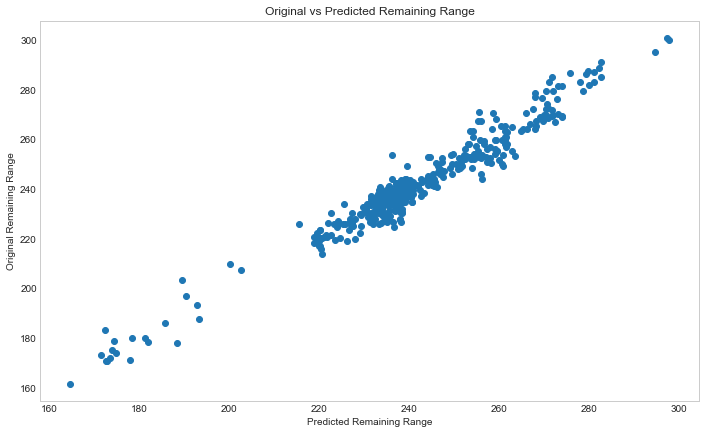

For estimator = 500
R^2: 0.952787172764
Root Mean Squared Error: 4.39445409868
---*---*---*---*---*---*---*---*---



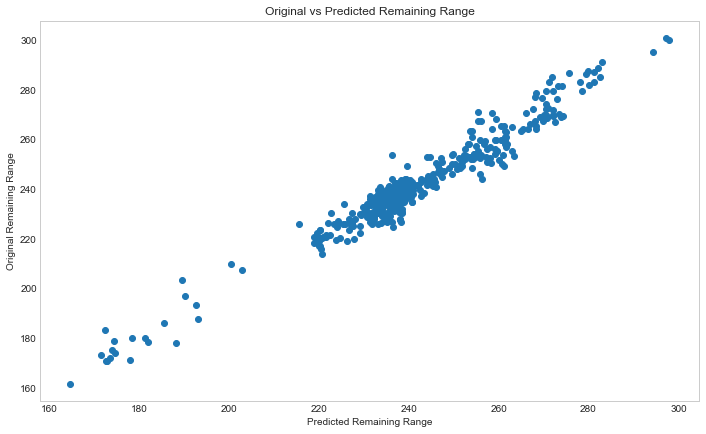

For estimator = 550
R^2: 0.952849121443
Root Mean Squared Error: 4.39157013686
---*---*---*---*---*---*---*---*---



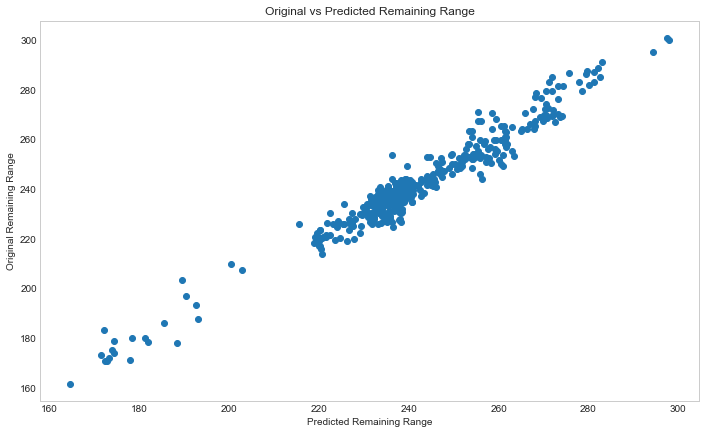

For estimator = 600
R^2: 0.952827521209
Root Mean Squared Error: 4.39257593023
---*---*---*---*---*---*---*---*---



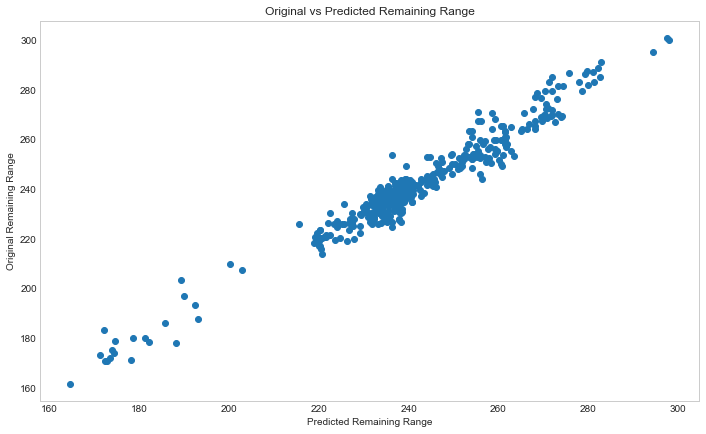

For estimator = 650
R^2: 0.95287854782
Root Mean Squared Error: 4.39019955616
---*---*---*---*---*---*---*---*---



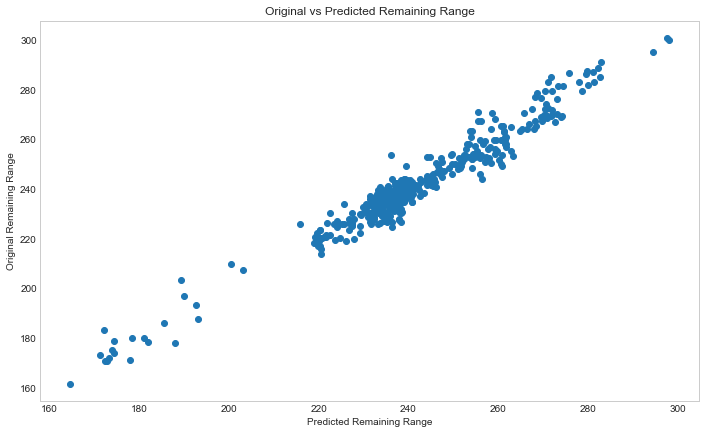

For estimator = 700
R^2: 0.952854914997
Root Mean Squared Error: 4.39130032662
---*---*---*---*---*---*---*---*---



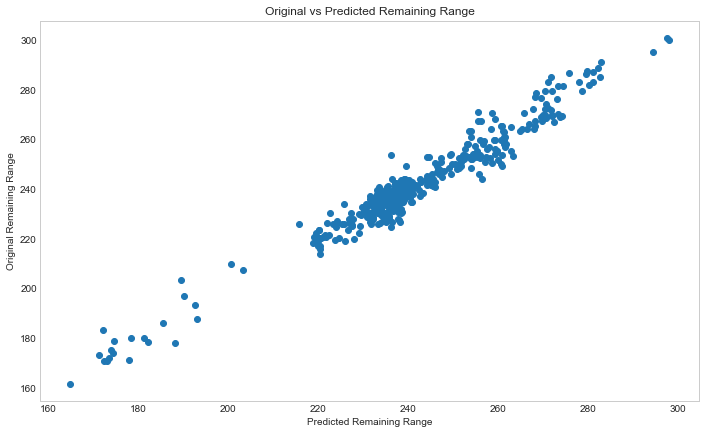

For estimator = 750
R^2: 0.952898023358
Root Mean Squared Error: 4.38929221638
---*---*---*---*---*---*---*---*---



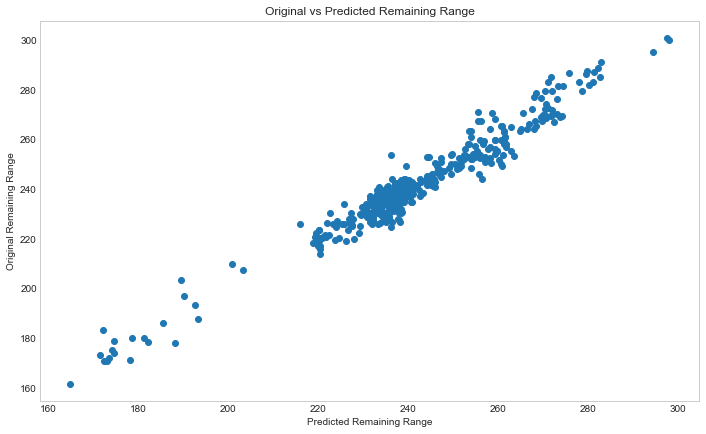

For estimator = 800
R^2: 0.952932173084
Root Mean Squared Error: 4.38770077251
---*---*---*---*---*---*---*---*---



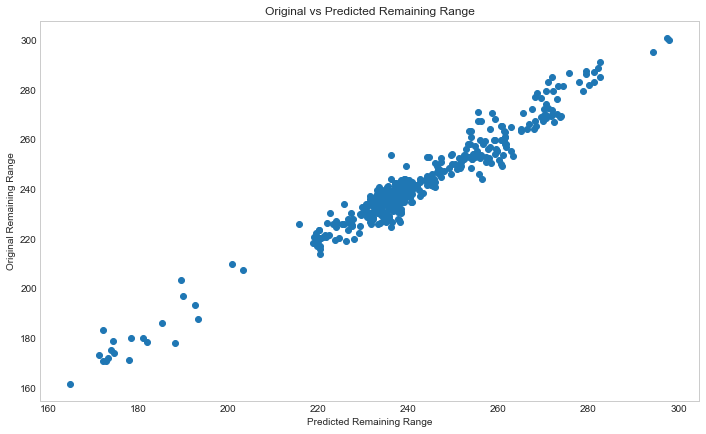

For estimator = 850
R^2: 0.953064963931
Root Mean Squared Error: 4.38150696592
---*---*---*---*---*---*---*---*---



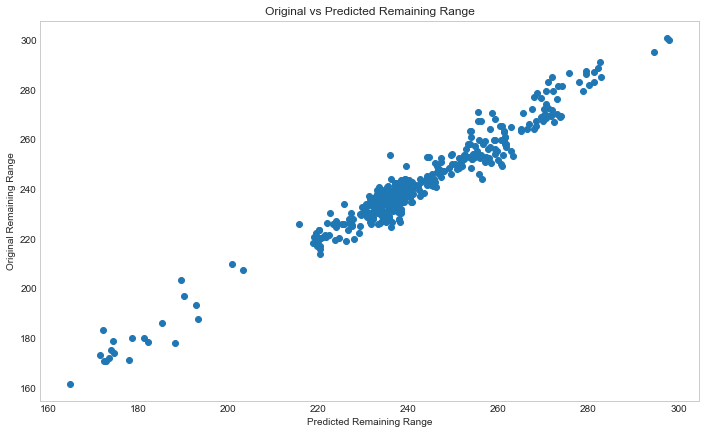

For estimator = 900
R^2: 0.953044435039
Root Mean Squared Error: 4.38246507376
---*---*---*---*---*---*---*---*---



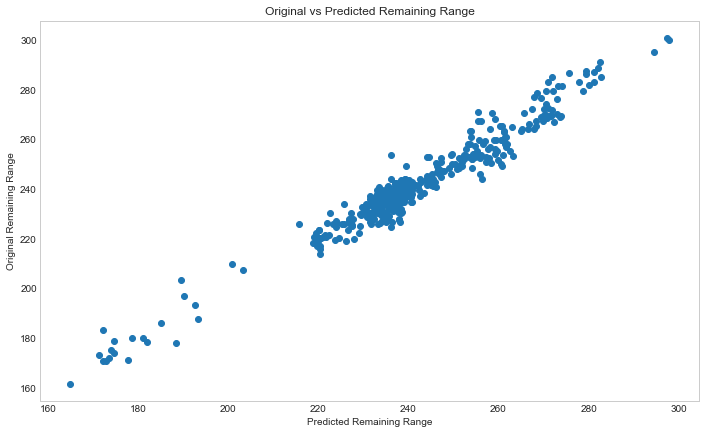

For estimator = 950
R^2: 0.95308359547
Root Mean Squared Error: 4.38063722843
---*---*---*---*---*---*---*---*---



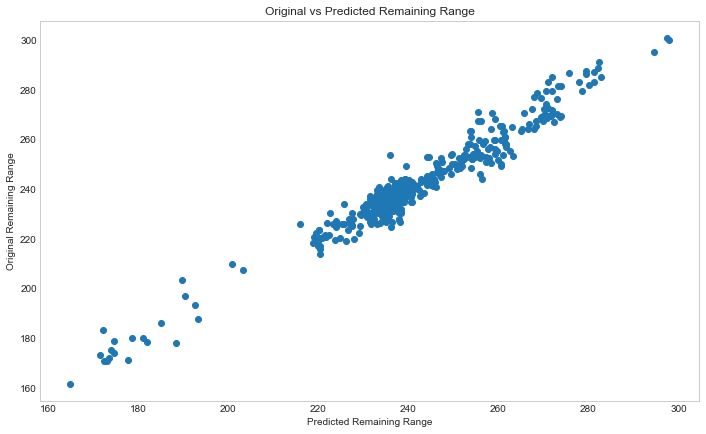

For estimator = 1000
R^2: 0.953060709333
Root Mean Squared Error: 4.38170555031
---*---*---*---*---*---*---*---*---



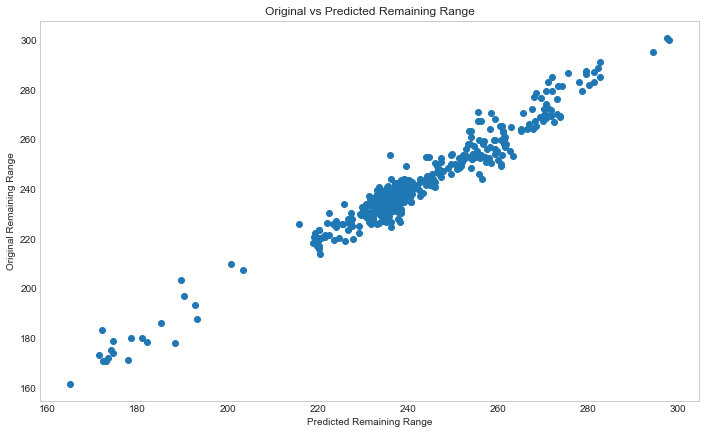

In [175]:
r_scores = []
rmse_scores = []
for estimator in range(50, 1001, 50):
    print('For estimator = ' + str(estimator))
    r2, rmse = RandomForest_regressor(X,df_regression.range_after_correction,estimator)
    r_scores.append(r2)
    rmse_scores.append(rmse)

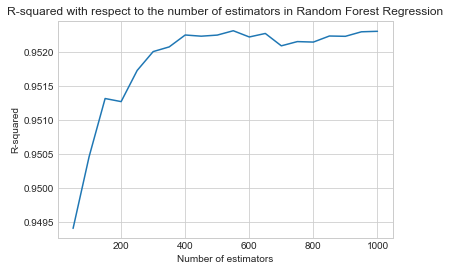

In [142]:
plt.plot(range(50, 1001, 50),r_scores)
plt.xlabel('Number of estimators')
plt.ylabel('R-squared')
plt.title('R-squared with respect to the number of estimators in Random Forest Regression')
plt.show()

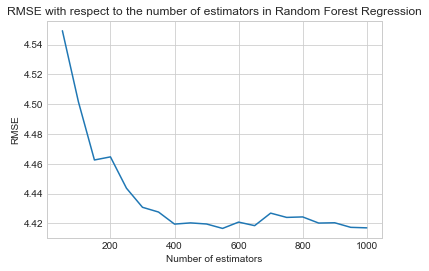

In [143]:
plt.plot(range(50, 1001, 50),rmse_scores)
plt.xlabel('Number of estimators')
plt.ylabel('RMSE')
plt.title('RMSE with respect to the number of estimators in Random Forest Regression')
plt.show()

R^2: 0.952245634352
Root Mean Squared Error: 4.41958477419
---*---*---*---*---*---*---*---*---



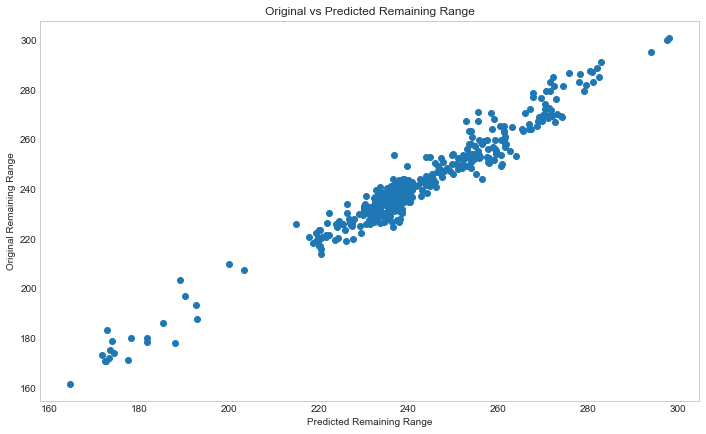

In [144]:
r2, rmse = RandomForest_regressor(X,df_regression.range_after_correction,500)
master_r2.append(r2)
master_rmse.append(rmse)

R^2: 0.50310321716
Root Mean Squared Error: 0.0183800593814
---*---*---*---*---*---*---*---*---



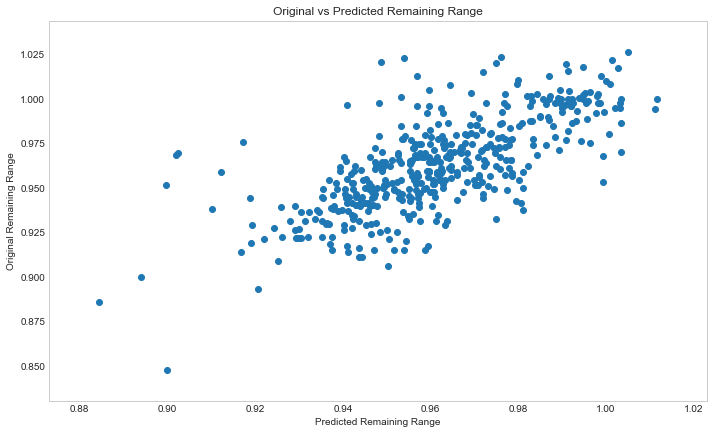

In [176]:
r2, rmse = RandomForest_regressor(X,df_regression.remaining_range,500)
percent_r2.append(r2)
percent_rmse.append(rmse)

<a href="#contents">Back to Table of Contents</a>

<h4><a id="skf" style="color: black;">Regression results</a></h4>

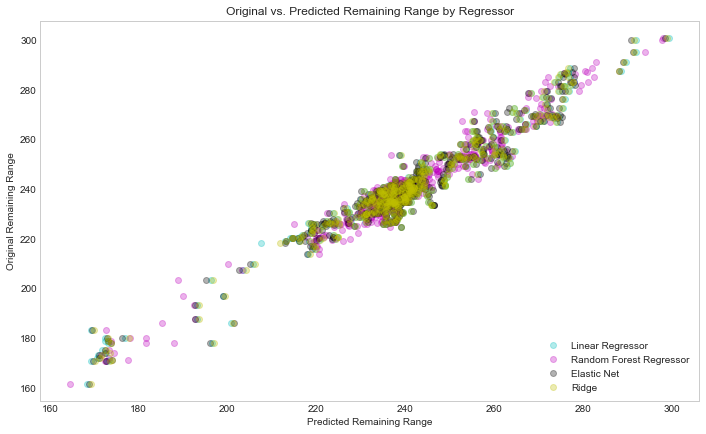

In [146]:
compare_plot(X,df_regression.range_after_correction,500)

In [147]:
regression_results_mi = pd.DataFrame({'Regressors': regressors, 'R-squared': master_r2,'Root Mean Squared Error': master_rmse})[['Regressors', 'R-squared','Root Mean Squared Error']]

In [148]:
regression_results_mi.sort_values('R-squared')

,Regressors,R-squared,Root Mean Squared Error
0,Linear Regression,0.935674,4.991040
2,Elastic Net,0.937386,5.060713
1,Ridge Regression,0.938464,5.016954
3,Random Forest,0.952246,4.419585


In [177]:
regression_results_percent = pd.DataFrame({'Regressors': regressors, 'R-squared': percent_r2,'Root Mean Squared Error': percent_rmse})[['Regressors', 'R-squared','Root Mean Squared Error']]

In [178]:
regression_results_percent.sort_values('R-squared')

,Regressors,R-squared,Root Mean Squared Error
0,Linear Regression,0.395981,0.019715
2,Elastic Net,0.401854,0.020166
1,Ridge Regression,0.403951,0.020131
3,Random Forest,0.503103,0.018380


<a href="#contents">Back to Table of Contents</a>

<h4><a id="s85" style="color: black;">Regression for Tesla Model S 85</a></h4>

In [228]:
def model_regression(df,model):
    df = df[df['model'] == model]
    cols_to_remove = ['wh_km', 'vehicle_age',
                  'range_mode_adjustment', 'comments','range_mode_new','new_car_range','daily_charge_power','unanswered','mileage_after_replacement','range_at_replacement',
                 'change_after_replacement','battery_replacement','range_at_full','range_mode','model',
                  'range_reading_date','manufacture_date','location','username','id', 'remaining_capacity', 'mileage_in_km',
                 'supercharging_frequency','lifetime_avg_energy_consumption','average_capacity_according_to_chart',
                 'deviation_in_capacity']
    df = df.drop(cols_to_remove, axis = 1)
    df['full_charge_with_time'] = df.full_charge_frequency * df.battery_age
    df['empty_charge_with_time'] = df.empty_charge_frequency * df.battery_age
    df['daily_charge_with_time'] = df.daily_charge * df.battery_age
    y_to_drop = ['remaining_range','range_after_correction']
    X = df.drop(y_to_drop, axis = 1)
    return df, X

In [229]:
df_regression_85 = new_tesla.copy()
df_regression_85, X = model_regression(df_regression_85, 'Model S 85')

In [220]:
s85_r = []
s85_rmse = []

[ 0.41929217  0.21156353 -0.04530717 -0.58849645  0.38775654]
Average 5-Fold CV Score: 0.0769617232722
R^2: 0.452820564729
Root Mean Squared Error: 0.0186053387487
---*---*---*---*---*---*---*---*---



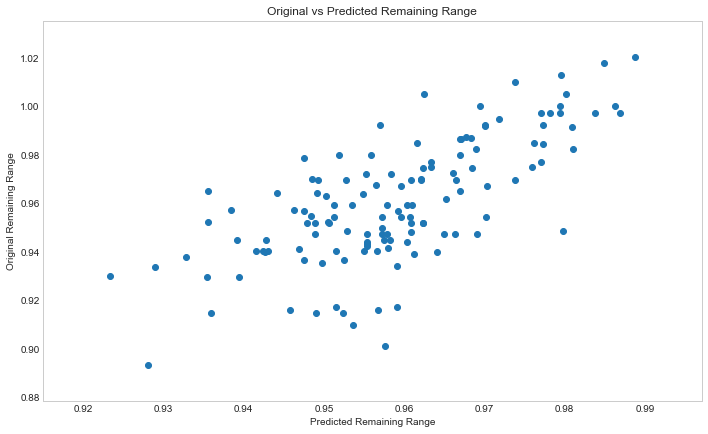

In [230]:
r2, rmse = linear_regression_estimator(X, df_regression_85.remaining_range)
s85_r.append(r2)
s85_rmse.append(rmse)

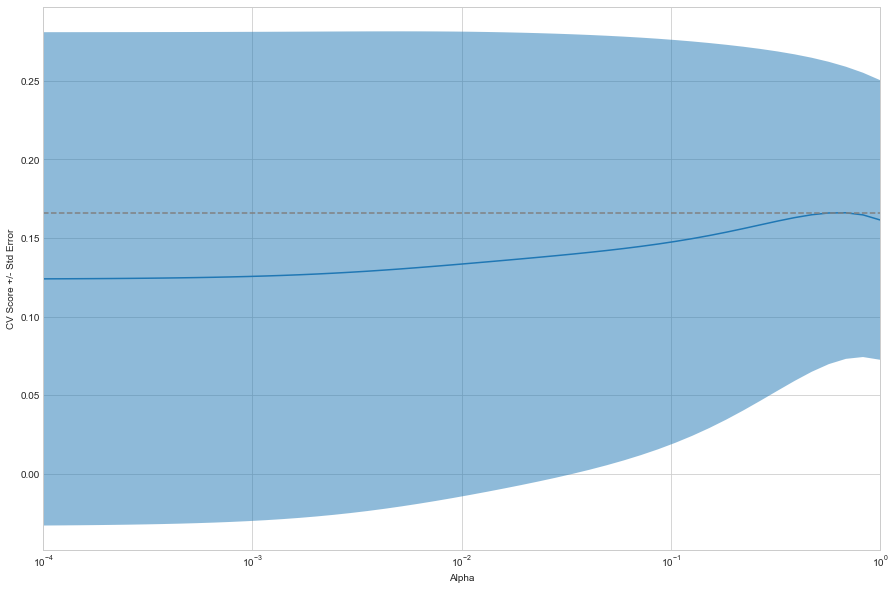

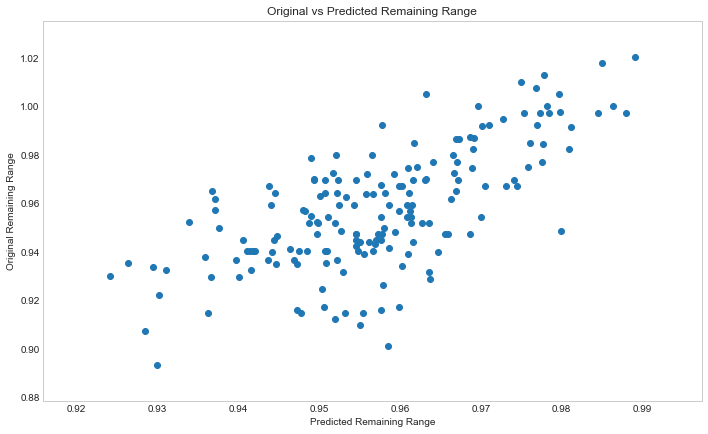

R^2: 0.446954909909
Root Mean Squared Error: 0.0184076048542
---*---*---*---*---*---*---*---*---



In [222]:
r2, rmse = Ridge_regressor(X,df_regression_85.remaining_range)
s85_r.append(r2)
s85_rmse.append(rmse)

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.421490016479
Tuned ElasticNet RMSE: 0.0188266236728


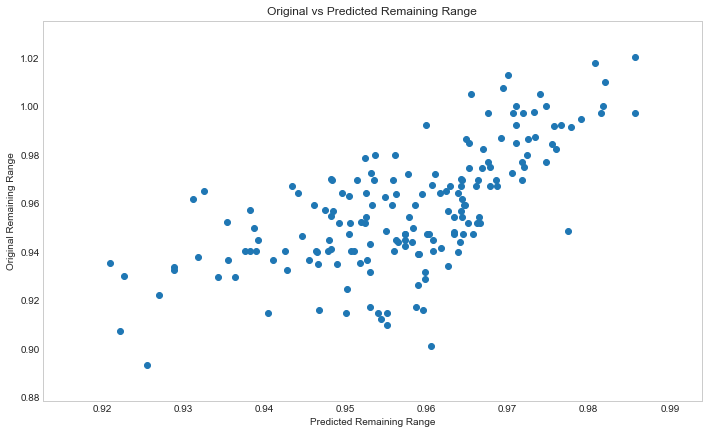

In [223]:
r2, rmse = ElasticNet_regressor(X, df_regression_85.remaining_range)
s85_r.append(r2)
s85_rmse.append(rmse)

R^2: 0.607534323989
Root Mean Squared Error: 0.0155066452937
---*---*---*---*---*---*---*---*---



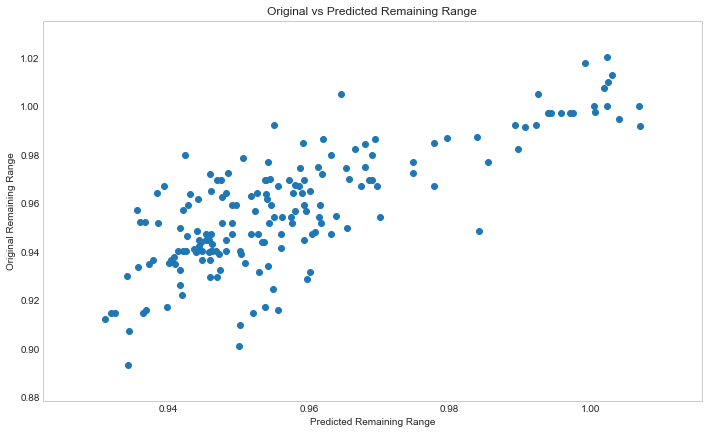

In [225]:
r2, rmse = RandomForest_regressor(X,df_regression_85.remaining_range,500)
s85_r.append(r2)
s85_rmse.append(rmse)

In [226]:
regression_results_85 = pd.DataFrame({'Regressors': regressors, 'R-squared': s85_r,'Root Mean Squared Error': s85_rmse})[['Regressors', 'R-squared','Root Mean Squared Error']]

In [227]:
regression_results_85.sort_values('R-squared')

,Regressors,R-squared,Root Mean Squared Error
2,Elastic Net,0.421490,0.018827
1,Ridge Regression,0.446955,0.018408
0,Linear Regression,0.452821,0.018605
3,Random Forest,0.607534,0.015507


<a href="#contents">Back to Table of Contents</a>

<h4><a id="sp85" style="color: black;">Regression for Tesla Model S P85</a></h4>

In [231]:
df_regression_P85 = new_tesla.copy()
P85, X = model_regression(df_regression_P85, 'Model S P85')

In [232]:
P85_r = []
P85_rmse = []

[-0.2899362   0.23764665  0.43517036 -0.13289393  0.25272522]
Average 5-Fold CV Score: 0.100542421014
R^2: 0.455413386342
Root Mean Squared Error: 0.014826352657
---*---*---*---*---*---*---*---*---



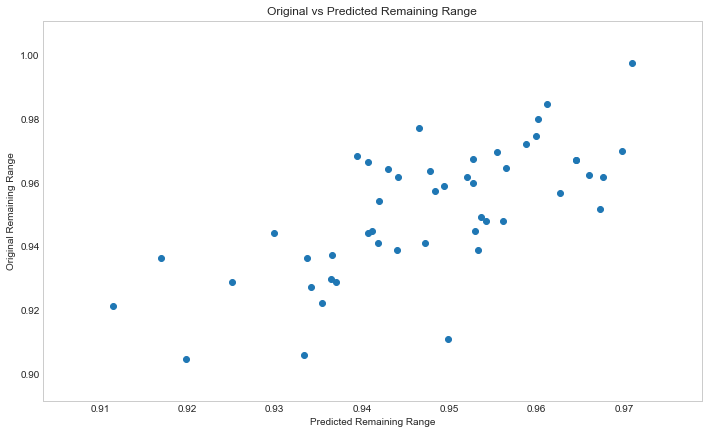

In [233]:
r2, rmse = linear_regression_estimator(X, P85.remaining_range)
P85_r.append(r2)
P85_rmse.append(rmse)

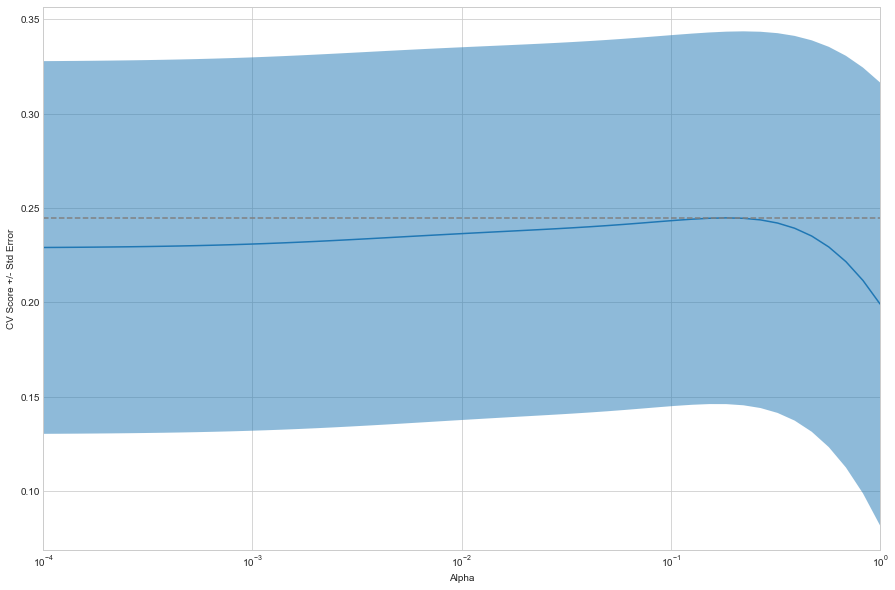

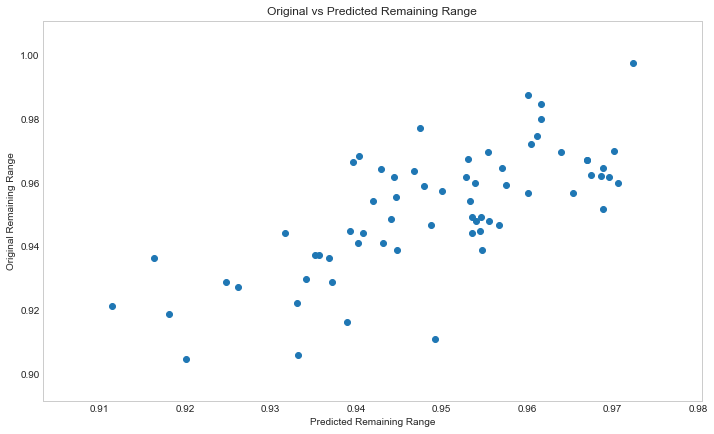

R^2: 0.498527378752
Root Mean Squared Error: 0.0136426091768
---*---*---*---*---*---*---*---*---



In [234]:
r2, rmse = Ridge_regressor(X,P85.remaining_range)
P85_r.append(r2)
P85_rmse.append(rmse)

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.490509897397
Tuned ElasticNet RMSE: 0.0137512348868


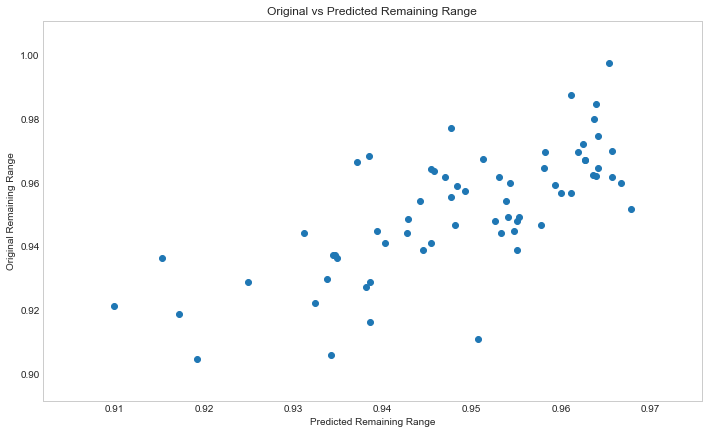

In [235]:
r2, rmse = ElasticNet_regressor(X, P85.remaining_range)
P85_r.append(r2)
P85_rmse.append(rmse)

R^2: 0.554204619732
Root Mean Squared Error: 0.0128629803531
---*---*---*---*---*---*---*---*---



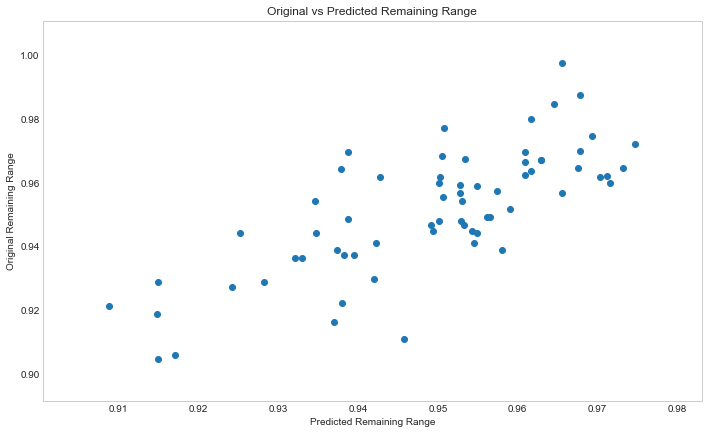

In [236]:
r2, rmse = RandomForest_regressor(X,P85.remaining_range,500)
P85_r.append(r2)
P85_rmse.append(rmse)

In [237]:
regression_results_P85 = pd.DataFrame({'Regressors': regressors, 'R-squared': P85_r,'Root Mean Squared Error': P85_rmse})[['Regressors', 'R-squared','Root Mean Squared Error']]

In [238]:
regression_results_P85.sort_values('R-squared')

,Regressors,R-squared,Root Mean Squared Error
0,Linear Regression,0.455413,0.014826
2,Elastic Net,0.490510,0.013751
1,Ridge Regression,0.498527,0.013643
3,Random Forest,0.554205,0.012863


<a href="#contents">Back to Table of Contents</a>